R2 EDA

In [ ]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
# Common imports
import numpy as np
import tarfile
import urllib
import pandas as pd
import urllib.request


In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
credit = pd.read_csv('cs-training.csv')

In [ ]:
import pandas as pd

# Load the dataset
 # Replace with the actual filename

# Check the unique classes in the dataset
num_classes = credit['SeriousDlqin2yrs'].nunique()

# Print the number of unique classes in the dataset
print(f'The dataset has {num_classes} unique classes.')


The dataset has 2 unique classes.


In [ ]:
# Label the classes based on their meaning
label_mapping = {0: "No Delinquency in 2 Years", 1: "Serious Delinquency in 2 Years"}

# Get the number of instances for each class
unique_classes = credit['SeriousDlqin2yrs'].value_counts()
print("Unique Classes and their counts with labels:")
for class_value, count in unique_classes.items():
    print(f"Class {class_value} ({label_mapping[class_value]}): {count} instances")


Unique Classes and their counts with labels:
Class 0 (No Delinquency in 2 Years): 139974 instances
Class 1 (Serious Delinquency in 2 Years): 10026 instances


In [ ]:
# Display the first five rows of the DataFrame
credit.head()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
#Print information about the DataFrame, including the dtype and columns, non-null values and memory usage.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
#Display more information of each column
credit.describe()

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                              4.192781    2037.818523   
min         0.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.175074   
50%        52.000000                              0.000000       0.366508   
75%        63.000000                              0.000000       0.868254   
max       109.000000                             98.000000  329664.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.202690e+05                    150000.000000   
mean    6.670221e+03                         8.452760   
std     1.438467e+04                         5.145951   
min     0.000000e+00                         0.000000   
25%     3.400000e+03                         5.000000   
50%     5.400000e+03                         8.000000   
75%     8.249000e+03                        11.000000   
max     3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            150000.000000                 150000.000000   
mean                  0.265973                      1.018240   
std                   4.169304                      1.129771   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [ ]:
credit.describe().transpose()

count          mean           std  \
Unnamed: 0                            150000.0  75000.500000  43301.414527   
SeriousDlqin2yrs                      150000.0      0.066840      0.249746   
RevolvingUtilizationOfUnsecuredLines  150000.0      6.048438    249.755371   
age                                   150000.0     52.295207     14.771866   
NumberOfTime30-59DaysPastDueNotWorse  150000.0      0.421033      4.192781   
DebtRatio                             150000.0    353.005076   2037.818523   
MonthlyIncome                         120269.0   6670.221237  14384.674215   
NumberOfOpenCreditLinesAndLoans       150000.0      8.452760      5.145951   
NumberOfTimes90DaysLate               150000.0      0.265973      4.169304   
NumberRealEstateLoansOrLines          150000.0      1.018240      1.129771   
NumberOfTime60-89DaysPastDueNotWorse  150000.0      0.240387      4.155179   
NumberOfDependents                    146076.0      0.757222      1.115086   

                                      min           25%           50%  \
Unnamed: 0                            1.0  37500.750000  75000.500000   
SeriousDlqin2yrs                      0.0      0.000000      0.000000   
RevolvingUtilizationOfUnsecuredLines  0.0      0.029867      0.154181   
age                                   0.0     41.000000     52.000000   
NumberOfTime30-59DaysPastDueNotWorse  0.0      0.000000      0.000000   
DebtRatio                             0.0      0.175074      0.366508   
MonthlyIncome                         0.0   3400.000000   5400.000000   
NumberOfOpenCreditLinesAndLoans       0.0      5.000000      8.000000   
NumberOfTimes90DaysLate               0.0      0.000000      0.000000   
NumberRealEstateLoansOrLines          0.0      0.000000      1.000000   
NumberOfTime60-89DaysPastDueNotWorse  0.0      0.000000      0.000000   
NumberOfDependents                    0.0      0.000000      0.000000   

                                                75%        max  
Unnamed: 0                            112500.250000   150000.0  
SeriousDlqin2yrs                           0.000000        1.0  
RevolvingUtilizationOfUnsecuredLines       0.559046    50708.0  
age                                       63.000000      109.0  
NumberOfTime30-59DaysPastDueNotWorse       0.000000       98.0  
DebtRatio                                  0.868254   329664.0  
MonthlyIncome                           8249.000000  3008750.0  
NumberOfOpenCreditLinesAndLoans           11.000000       58.0  
NumberOfTimes90DaysLate                    0.000000       98.0  
NumberRealEstateLoansOrLines               2.000000       54.0  
NumberOfTime60-89DaysPastDueNotWorse       0.000000       98.0  
NumberOfDependents                         1.000000       20.0

In [ ]:
# Classify each feature's level of measurement
def classify_measurement_level(column, unique_values):
    # Check data types
    if pd.api.types.is_bool_dtype(column):
        return "Binary"
    elif pd.api.types.is_numeric_dtype(column):
        if unique_values <= 10:
            return "Ordinal"  # Numeric but small range
        else:
            # Further classify numeric types
            if (column.min() == 0 or column.min() > 0):
                return "Ratio"  # Has a meaningful zero point
            else:
                return "Interval"  # Doesn't have meaningful zero point
    elif pd.api.types.is_string_dtype(column):
        if unique_values <= 10:
            return "Nominal"  # Non-numeric small set of categories
        else:
            return "Nominal"  # Many unique strings
    elif pd.api.types.is_categorical_dtype(column):
        return "Ordinal" if column.ordered else "Nominal"  # If there is a specific order, it's Ordinal
    else:
        return "Unknown"

# Analyze dataset
def analyze_dataset(df, dataset_name):
    print(f"\n--- Analyzing {dataset_name} ---")

    # General dataset information
    print(f"Number of instances (rows): {df.shape[0]}")
    print(f"Number of attributes (columns): {df.shape[1]}")

    # Display dataset's first few rows
    print("\nFirst five rows of the dataset:")
    print(df.head())

    # Check for the unique values in each column and classify the measurement level
    print("\nColumn Measurement Level Classification:")
    for column in df.columns:
        unique_values = df[column].nunique()
        measurement_level = classify_measurement_level(df[column], unique_values)
        print(f"Column '{column}': {measurement_level}, Unique Values: {unique_values}")

    # Summary statistics for continuous variables
    print("\nSummary statistics for continuous variables:")
    print(credit.describe())

    # Check for missing values
    print("\nMissing values in the dataset:")
    print(credit.isnull().sum())

    print("\nRows with missing values:")
    print(credit[credit.isnull().any(axis=1)])

# Analyze dataset
analyze_dataset(credit, "First Dataset")



--- Analyzing First Dataset ---
Number of instances (rows): 150000
Number of attributes (columns): 12

First five rows of the dataset:
   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926

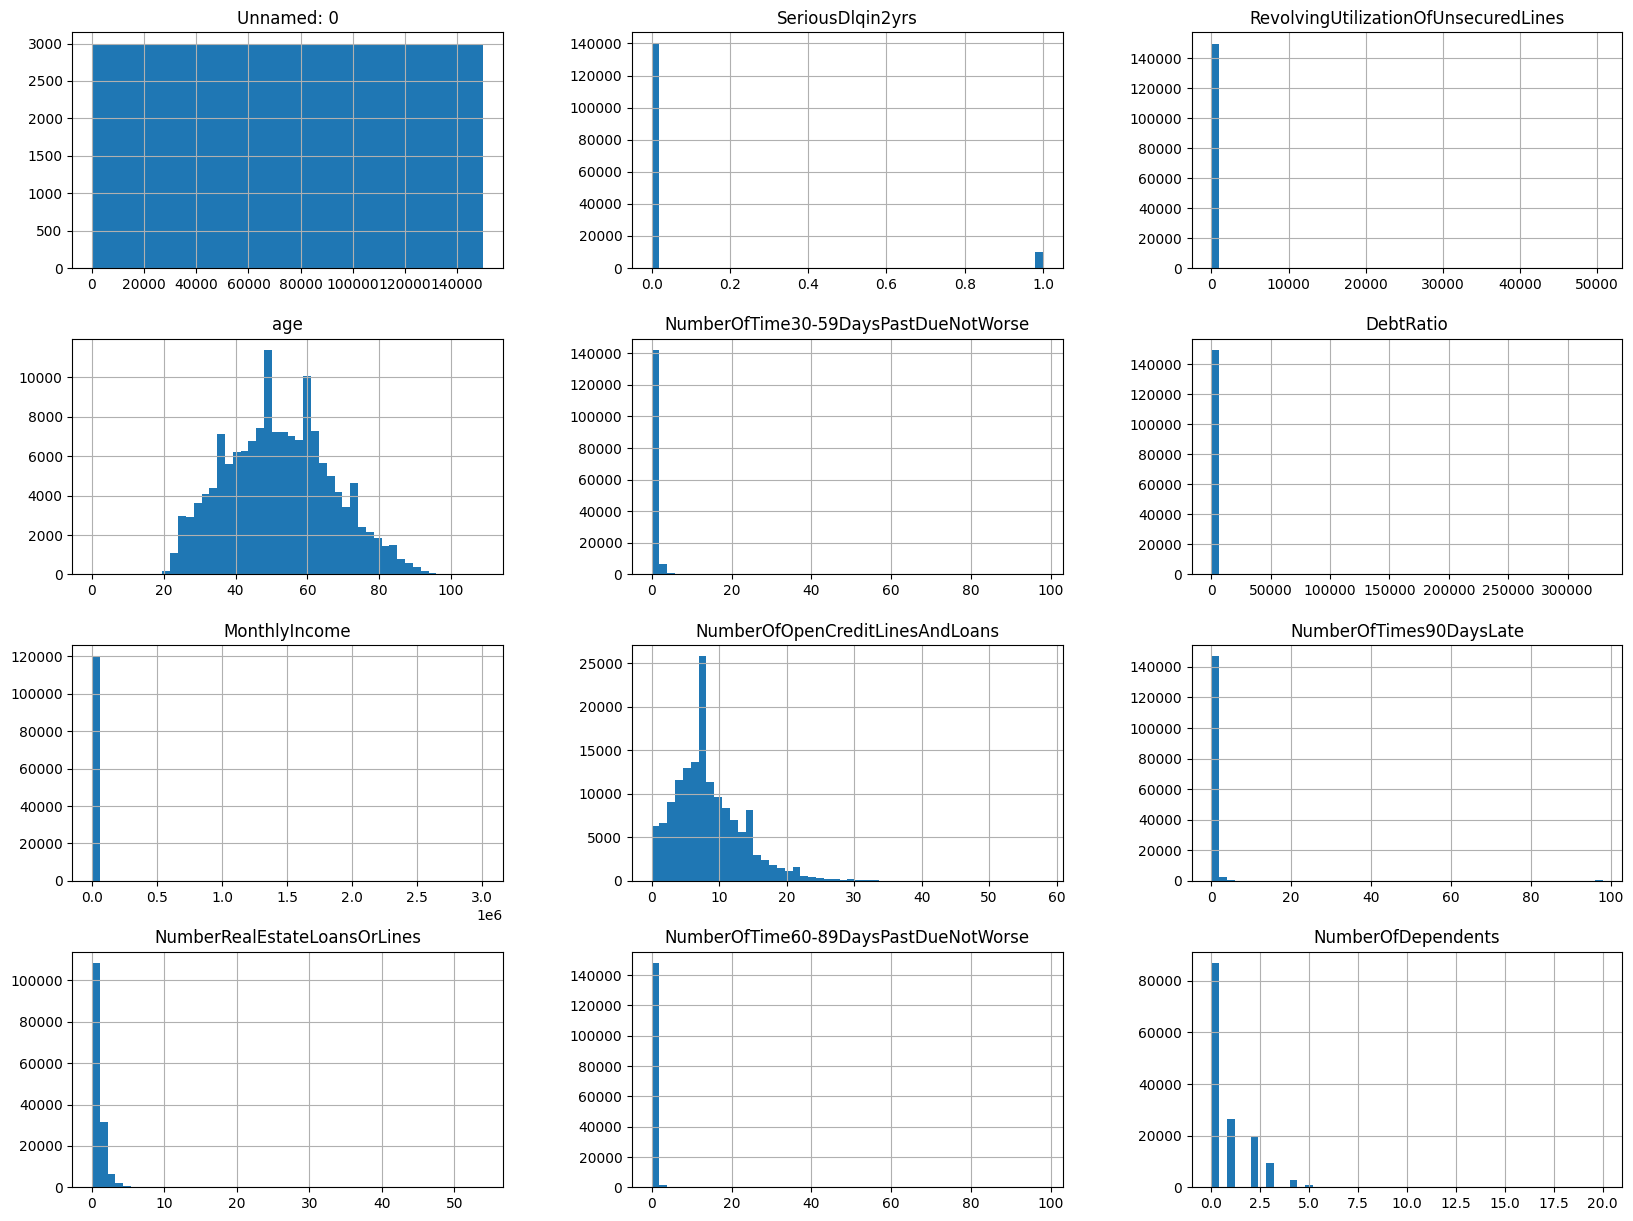

In [ ]:
#To plot a histogram for each numerical attribute
credit.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

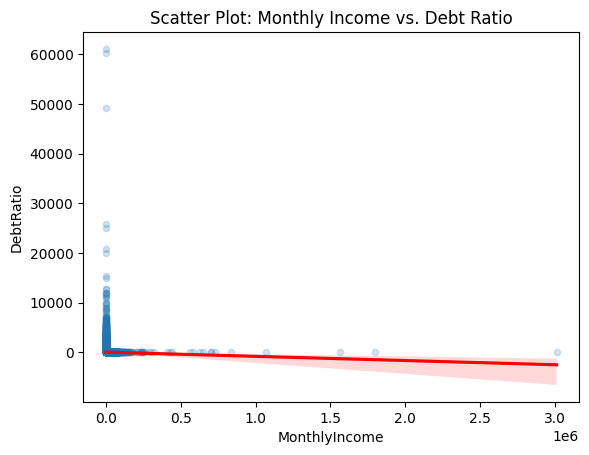

In [ ]:
# Example: Scatter plot with regression line for DebtRatio and MonthlyIncome
credit.plot(kind="scatter", x="MonthlyIncome", y="DebtRatio", alpha=0.2)
plt.title("Scatter Plot: Monthly Income vs. Debt Ratio")
plt.xlabel("Monthly Income")
plt.ylabel("Debt Ratio")
# Optionally, fit and plot a regression line
sns.regplot(x="MonthlyIncome", y="DebtRatio", data=credit, scatter=False, color="red")
plt.show()

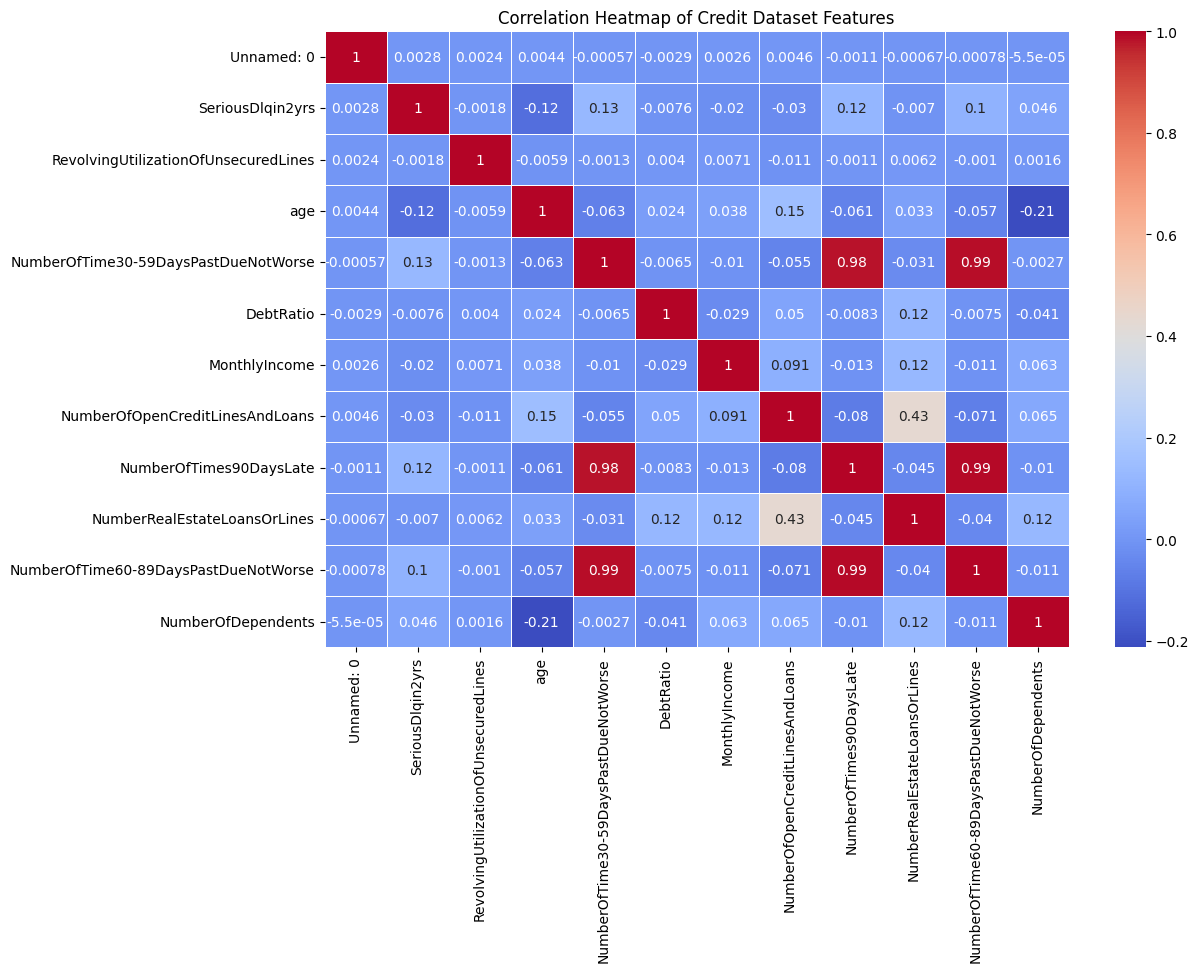

In [ ]:
import seaborn as sns

# Compute the correlation matrix for the credit dataset
corr_matrix = credit.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Credit Dataset Features")
plt.show()

In [ ]:
sample_incomplete_rows = credit[credit.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
6            7                 0                              0.305682   57   
8            9                 0                              0.116951   27   
16          17                 0                              0.061086   78   
32          33                 0                              0.083418   62   
41          42                 0                              0.072898   81   

    NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
6                                      0     5710.0            NaN   
8                                      0       46.0            NaN   
16                                     0     2058.0            NaN   
32                                     0      977.0            NaN   
41                                     0       75.0            NaN   

    NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
6                                 8                        0   
8                                 2                        0   
16                               10                        0   
32                                6                        0   
41                                7                        0   

    NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
6                              3                                     0   
8                              0                                     0   
16                             2                                     0   
32                             1                                     0   
41                             0                                     0   

    NumberOfDependents  
6                  0.0  
8                  NaN  
16                 0.0  
32                 0.0  
41                 0.0

In [ ]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["MonthlyIncome"])
#Q12 What is displayed below? Note your observation

Empty DataFrame
Columns: [Unnamed: 0, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents]
Index: []

In [ ]:
sample_incomplete_rows.drop("MonthlyIncome", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12


Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
6            7                 0                              0.305682   57   
8            9                 0                              0.116951   27   
16          17                 0                              0.061086   78   
32          33                 0                              0.083418   62   
41          42                 0                              0.072898   81   

    NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  \
6                                      0     5710.0   
8                                      0       46.0   
16                                     0     2058.0   
32                                     0      977.0   
41                                     0       75.0   

    NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
6                                 8                        0   
8                                 2                        0   
16                               10                        0   
32                                6                        0   
41                                7                        0   

    NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
6                              3                                     0   
8                              0                                     0   
16                             2                                     0   
32                             1                                     0   
41                             0                                     0   

    NumberOfDependents  
6                  0.0  
8                  NaN  
16                 0.0  
32                 0.0  
41                 0.0

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'credit' is your DataFrame containing the dataset.
# Define 'X' and 'y' again
X = credit.drop("SeriousDlqin2yrs", axis=1)  # Drop target variable from features
y = credit["SeriousDlqin2yrs"]  # Target variable
X_dropped = X.dropna()
y_dropped = y.loc[X_dropped.index]  # Keep the corresponding rows in y

# Apply SelectKBest to extract top features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X_dropped, y_dropped)

# Create a DataFrame to display feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

                                 Feature        Score
3   NumberOfTime30-59DaysPastDueNotWorse  1852.321988
7                NumberOfTimes90DaysLate  1504.384585
2                                    age  1281.630144
9   NumberOfTime60-89DaysPastDueNotWorse  1068.379731
10                    NumberOfDependents   262.909343
6        NumberOfOpenCreditLinesAndLoans    90.654065
5                          MonthlyIncome    46.908783
0                             Unnamed: 0     2.748860
4                              DebtRatio     1.302832
8           NumberRealEstateLoansOrLines     1.086088
1   RevolvingUtilizationOfUnsecuredLines     0.684401


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


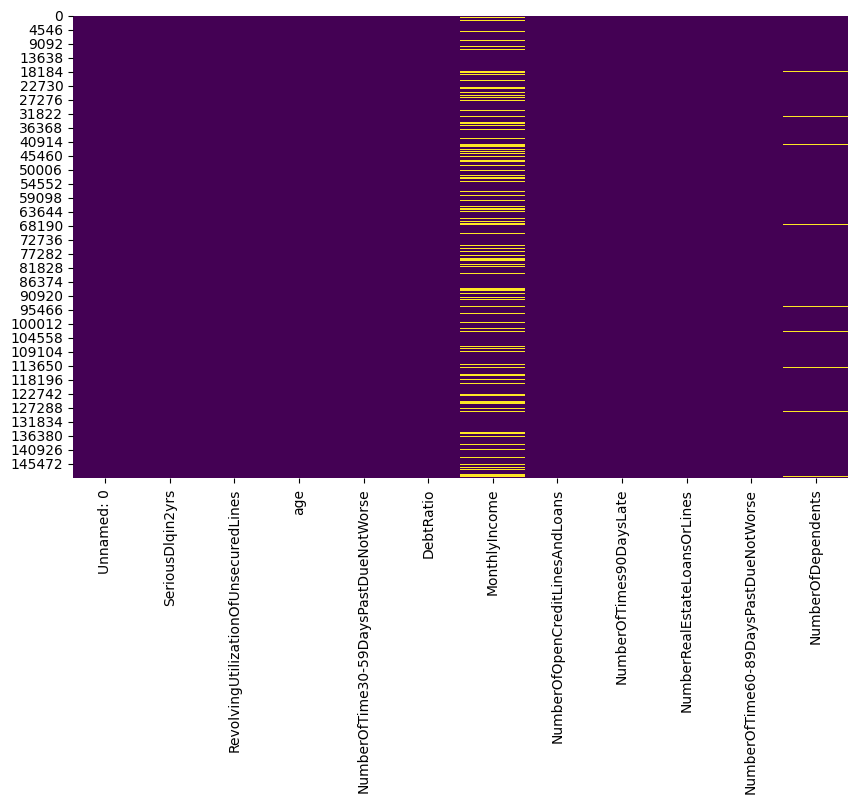

<class 'pandas.core.frame.DataFrame'>
Index: 90397 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      90397 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  90397 non-null  float64
 2   age                                   90397 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  90397 non-null  int64  
 4   DebtRatio                             90397 non-null  float64
 5   MonthlyIncome                         90397 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       90397 non-null  int64  
 7   NumberOfTimes90DaysLate               90397 non-null  int64  
 8   NumberRealEstateLoansOrLines          90397 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  90397 non-null  int64  
 10  NumberOfDependents                    90397 non-null  float64
dtypes: float64(4), int6

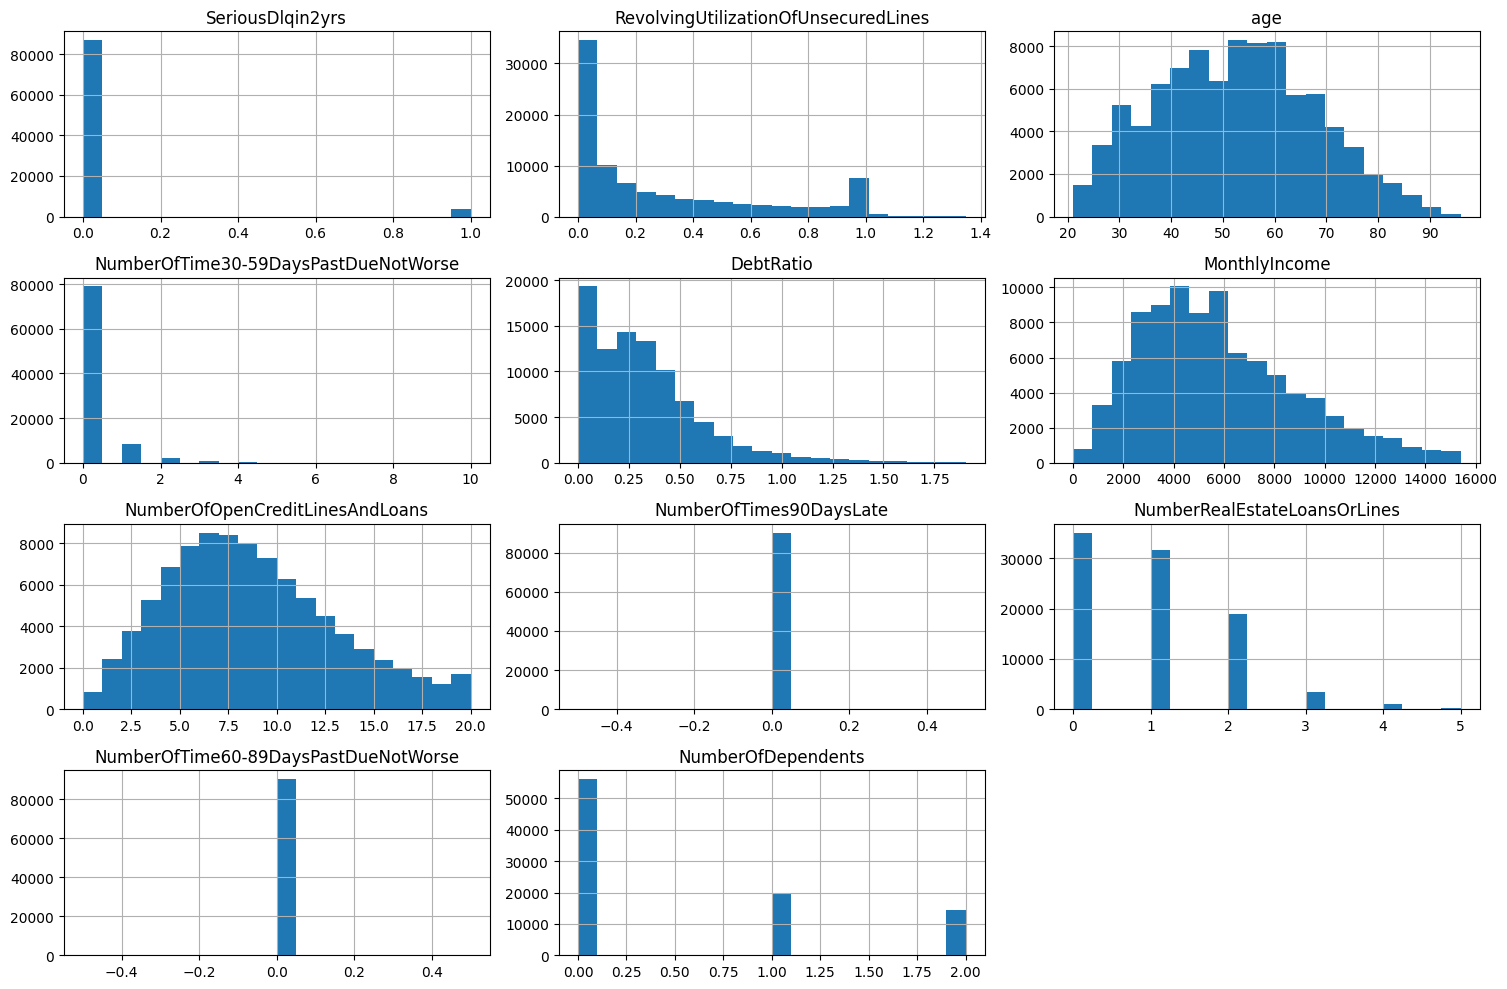

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines           age  \
count      90397.000000                          90397.000000  90397.000000   
mean           0.039161                              0.294770     52.346925   
std            0.193978                              0.333021     15.212782   
min            0.000000                              0.000000     21.000000   
25%            0.000000                              0.026957     41.000000   
50%            0.000000                              0.138972     52.000000   
75%            0.000000                              0.492133     63.000000   
max            1.000000                              1.347578     96.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          90397.000000  90397.000000   90397.000000   
mean                               0.176012      0.330158    5788.111298   
std                                0.544905      0.286840   

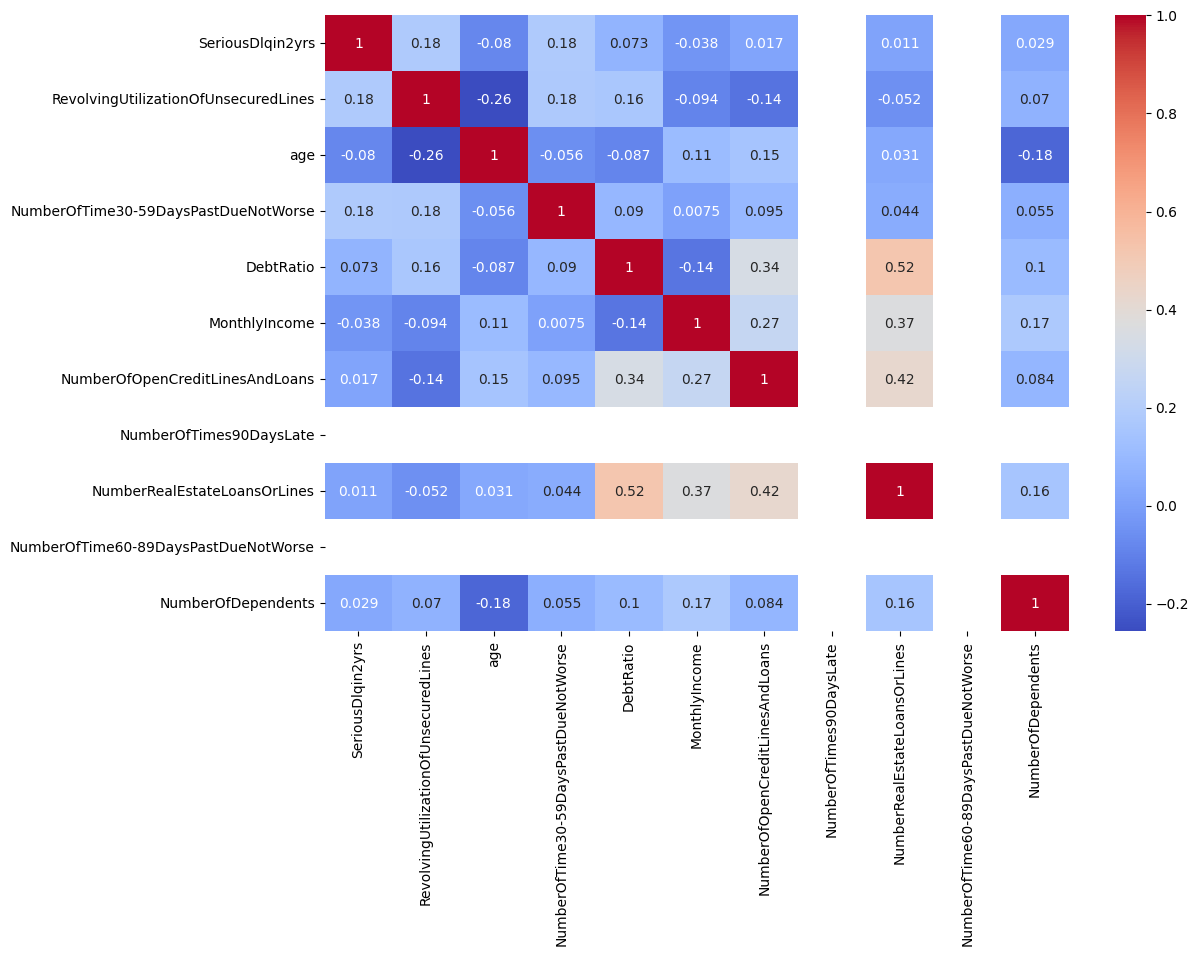

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
credit = pd.read_csv('cs-training.csv')

# Check for missing values
print(credit.isnull().sum())

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(credit.isnull(), cbar=False, cmap='viridis')
plt.show()

# Handle missing values (example: impute with median)
credit.fillna(credit.median(), inplace=True)

# Drop Unnamed column (if it's just an index)
if 'Unnamed: 0' in credit.columns:
    credit.drop(columns=['Unnamed: 0'], inplace=True)

# Handle outliers only in numerical columns
num_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome',
               'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
               'NumberOfDependents']

for col in num_columns:
    Q1 = credit[col].quantile(0.25)
    Q3 = credit[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    credit = credit[(credit[col] >= lower_bound) & (credit[col] <= upper_bound)]

# Verify the data cleanliness after outlier removal and missing value handling
print(credit.info())

# Visualize the distribution of the numerical columns
credit.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

# Check the summary statistics to validate results after cleaning
print(credit.describe())

# Optional: Check correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(credit.corr(), annot=True, cmap='coolwarm')
plt.show()


Handling missing Values

Missing values before imputation:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Missing values after imputation:
Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate        

<ipython-input-41-93f9c561729b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].mean(), inplace=True)
<ipython-input-41-93f9c561729b>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

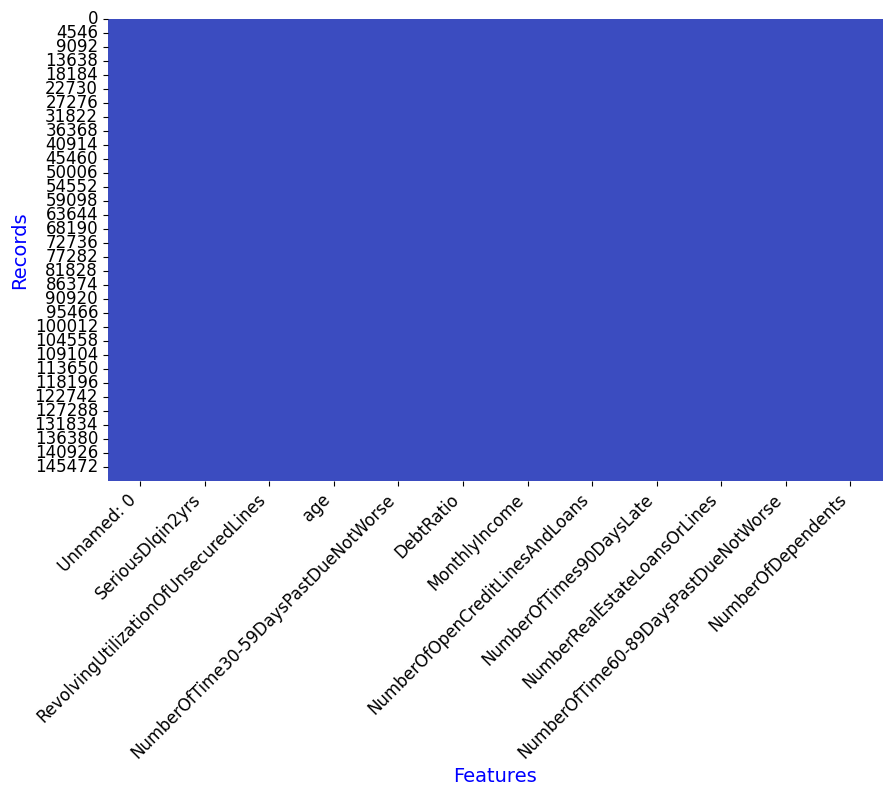


Missing values after dropping rows:
Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Data saved as 'credit_cleaned'


SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
ID                                                                
1                  1                              0.766127   45   
2                  0                              0.957151   40   
3                  0                              0.658180   38   
4                  0                              0.233810   30   
5                  0                              0.907239   49   

    NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
ID                                                                   
1                                      2   0.802982         9120.0   
2                                      0   0.121876         2600.0   
3                                      1   0.085113         3042.0   
4                                      0   0.036050         3300.0   
5                                      1   0.024926        63588.0   

    NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
ID                                                             
1                                13                        0   
2                                 4                        0   
3                                 2                        1   
4                                 5                        0   
5                                 7                        0   

    NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
ID                                                                       
1                              6                                     0   
2                              0                                     0   
3                              0                                     0   
4                              0                                     0   
5                              1                                     0   

    NumberOfDependents  
ID                      
1                  2.0  
2                  1.0  
3                  0.0  
4                  0.0  
5                  0.0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
credit = pd.read_csv('cs-training.csv')

# Check for missing values before imputation
print("Missing values before imputation:")
print(credit.isnull().sum())

# Impute missing values with the median for MonthlyIncome and NumberOfDependents
# credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].median(), inplace=True)
credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].mean(), inplace=True)
# credit['NumberOfDependents'].fillna(credit['NumberOfDependents'].median(), inplace=True)
credit['NumberOfDependents'].fillna(credit['NumberOfDependents'].mean(), inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(credit.isnull().sum())

# Visualize missing values after imputation (to confirm)
plt.figure(figsize=(10, 6))
sns.heatmap(credit.isnull(), cbar=False, cmap='coolwarm')

# Customize the axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')  # Customize the x-axis labels
plt.yticks(fontsize=12, color='black')  # Customize the y-axis labels

# Customize heatmap labels further (optional)
plt.xlabel('Features', fontsize=14, color='blue')  # Customize x-axis label
plt.ylabel('Records', fontsize=14, color='blue')   # Customize y-axis label

# Show the plot
plt.show()

# Drop rows with missing values
credit.dropna(inplace=True)

# Check for missing values after removing rows
print("\nMissing values after dropping rows:")
print(credit.isnull().sum())

#Saving Null Handled Dataset
credit_cleaned = credit
#credit.to_csv('credit_cleaned.csv', index=True)
print("\nData saved as 'credit_cleaned'")

# after handling null values
credit_cleaned.isnull().sum()

# renaming unnamed column and setting it as index colum
credit_cleaned.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
credit_cleaned.set_index('ID',inplace=True)

credit_cleaned.head()

<ipython-input-43-f0233c00de65>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].median(), inplace=True)
<ipython-input-43-f0233c00de65>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method


Missing values after imputation:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


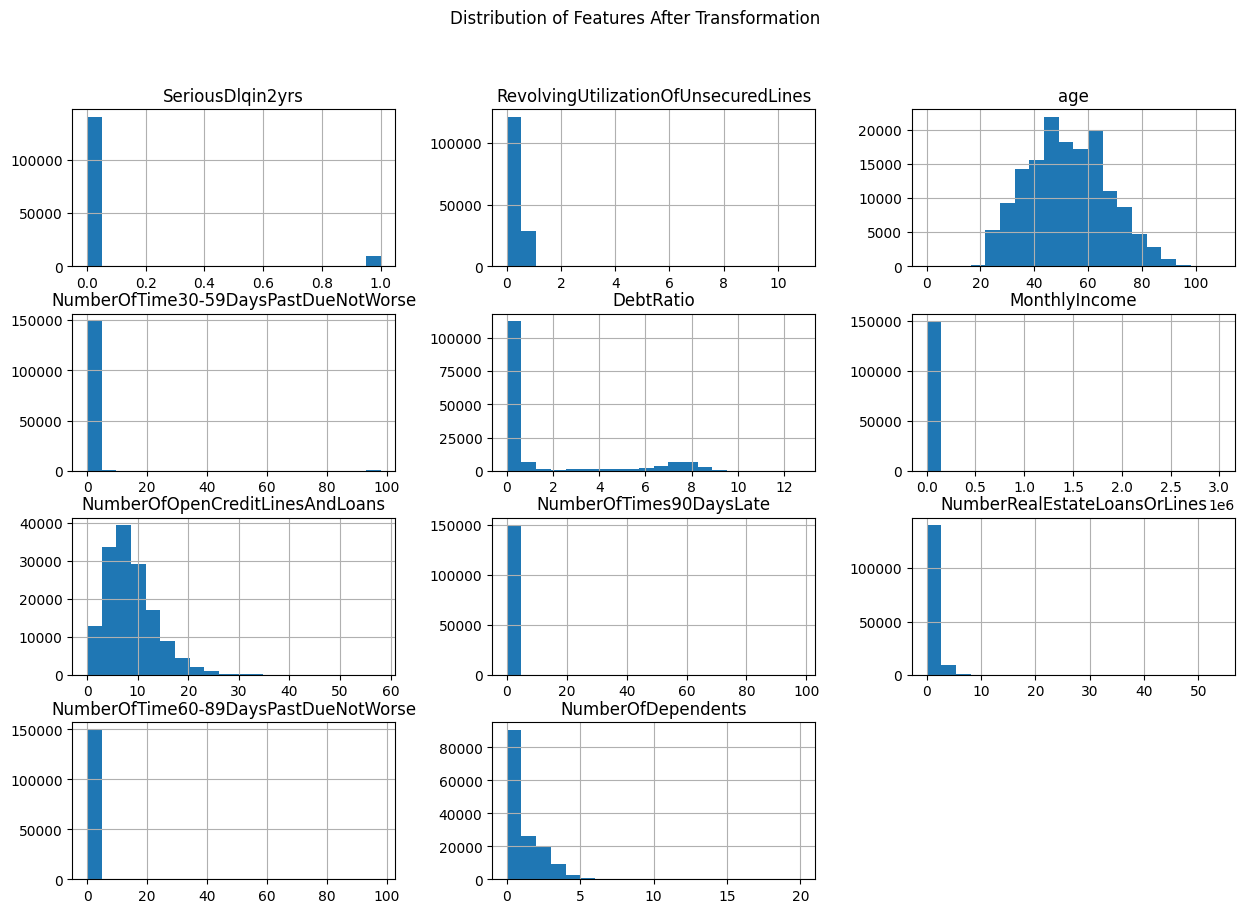

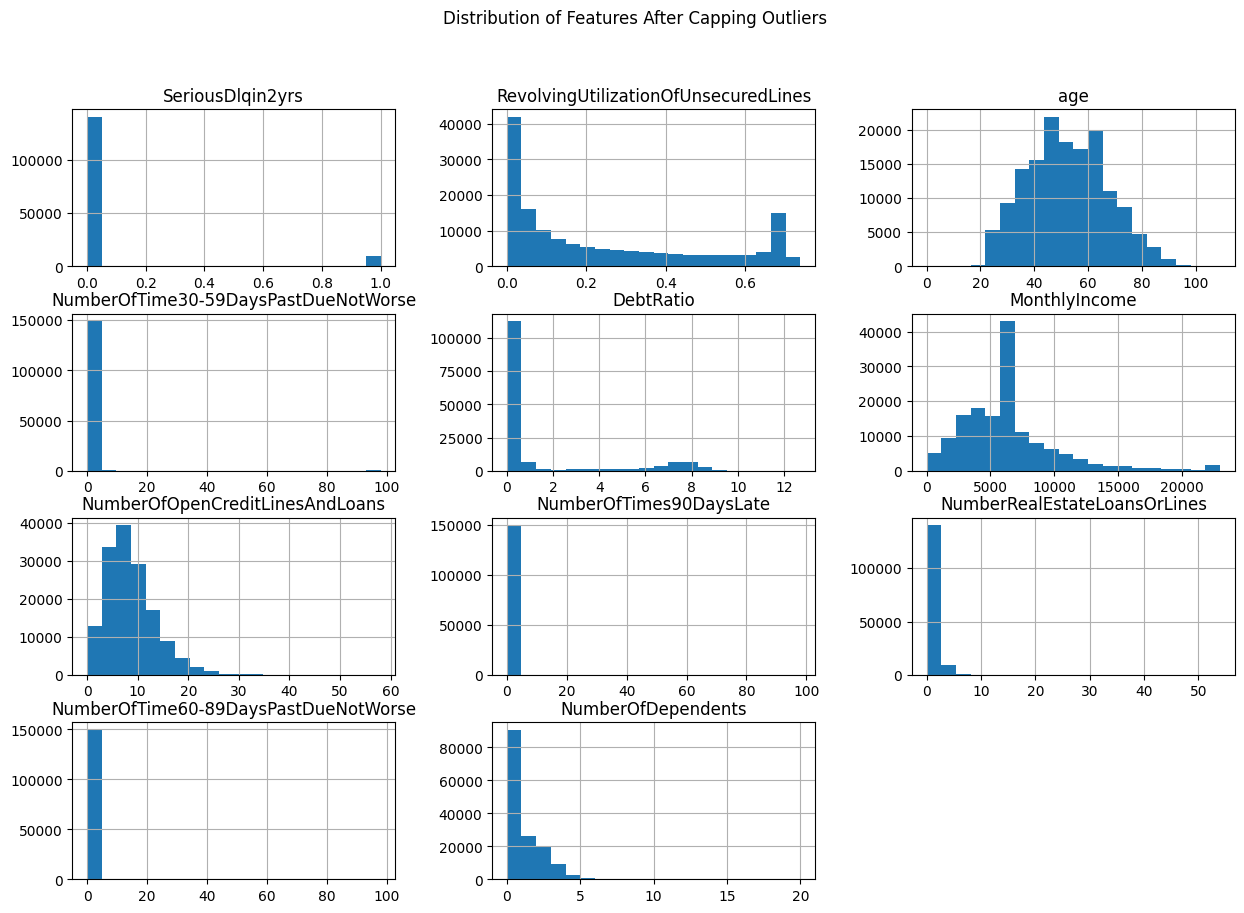

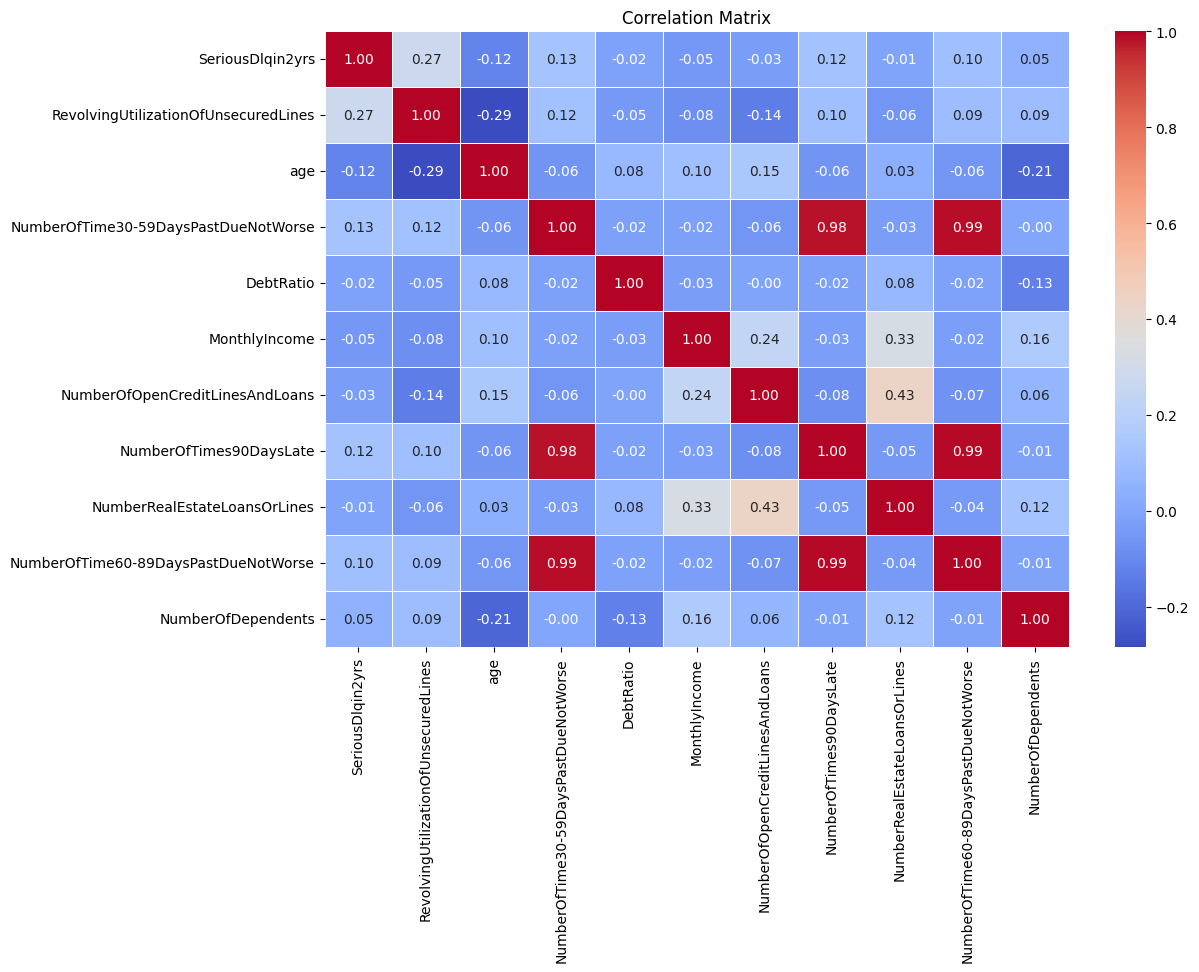


Columns after dropping correlated features:
Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

Final missing values check:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
dtype: int64

Summary statistics after data cleansing:
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  1500

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# credit = pd.read_csv('cs-training.csv')

### 1. Missing Values Imputation

# Impute missing values with the median for MonthlyIncome and NumberOfDependents
credit['MonthlyIncome'].fillna(credit['MonthlyIncome'].median(), inplace=True)
credit['NumberOfDependents'].fillna(credit['NumberOfDependents'].median(), inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(credit.isnull().sum())

### 2. Handle Skewness with Log Transformation

# Apply log transformation to reduce skewness for highly skewed features
credit['RevolvingUtilizationOfUnsecuredLines'] = np.log1p(credit['RevolvingUtilizationOfUnsecuredLines'])
credit['DebtRatio'] = np.log1p(credit['DebtRatio'])

# Check the distribution after transformation by plotting histograms
credit_cleaned.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Features After Transformation')
plt.show()

### 3. Handle Outliers by Capping at the 99th Percentile

# Function to cap outliers at the 99th percentile
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.99)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

# Apply capping to relevant columns
cap_outliers(credit_cleaned, 'MonthlyIncome')
cap_outliers(credit_cleaned, 'RevolvingUtilizationOfUnsecuredLines')

# Check distributions again to see the effect of capping
credit_cleaned.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Features After Capping Outliers')
plt.show()

### 4. Handle Correlated Features

# Compute the correlation matrix
correlation_matrix = credit_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Drop one of the highly correlated features
credit_cleaned.drop(columns=['NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)

# Check the columns after dropping highly correlated features
print("\nColumns after dropping correlated features:")
print(credit_cleaned.columns)

### Final Data Check

# Check if the dataset has no missing values and is ready for modeling
print("\nFinal missing values check:")
print(credit_cleaned.isnull().sum())

# Print summary statistics to ensure everything is in the expected range
print("\nSummary statistics after data cleansing:")
print(credit_cleaned.describe())


Dataset loaded successfully.
Descriptive statistics:
          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  120269.000000     120269.000000                         120269.000000   
mean    75026.012514          0.069486                              5.899873   
std     43286.029117          0.254280                            257.040685   
min         1.000000          0.000000                              0.000000   
25%     37678.000000          0.000000                              0.035084   
50%     74969.000000          0.000000                              0.177282   
75%    112494.000000          0.000000                              0.579428   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  120269.000000                         120269.000000  120269.000000   
mean       51.289792                              0.381769      26.59877

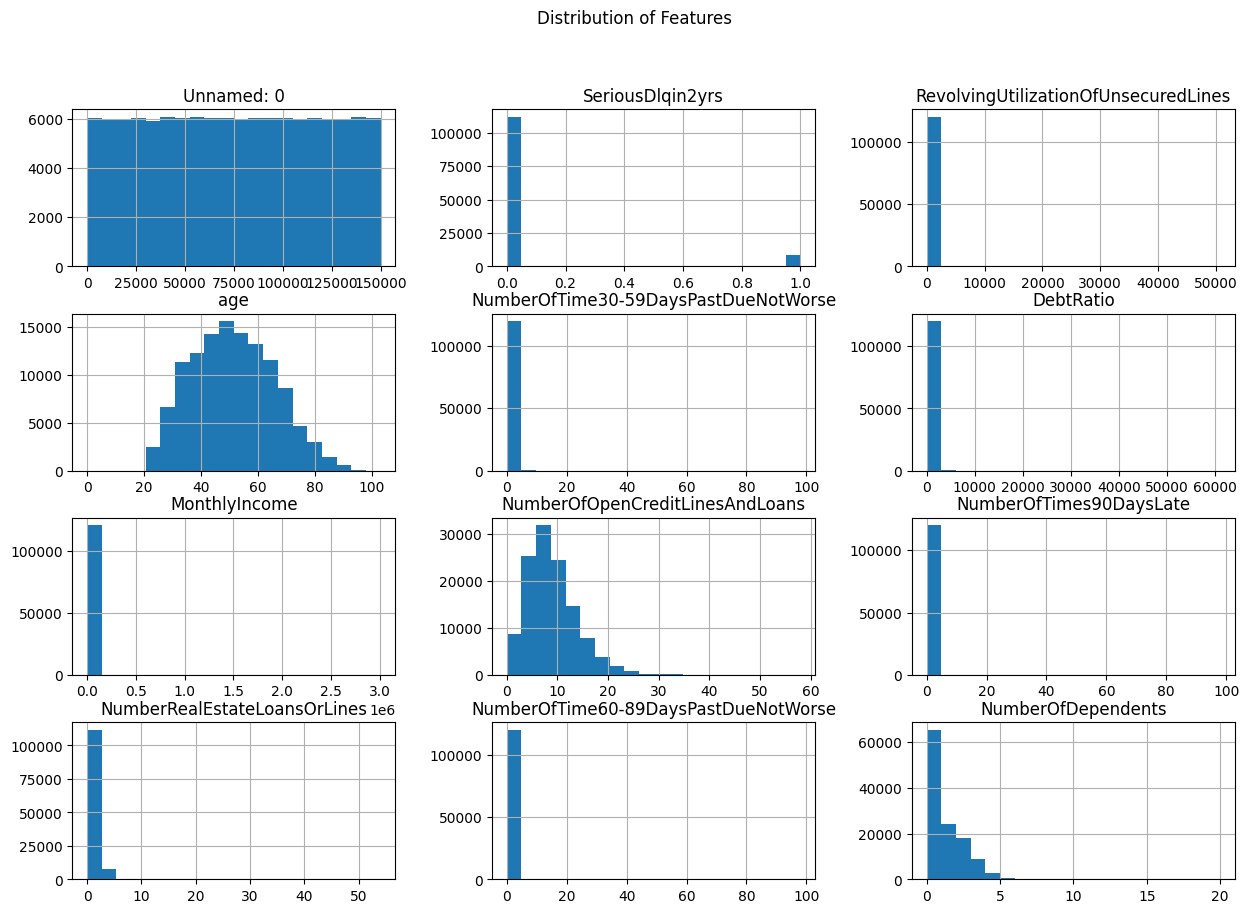

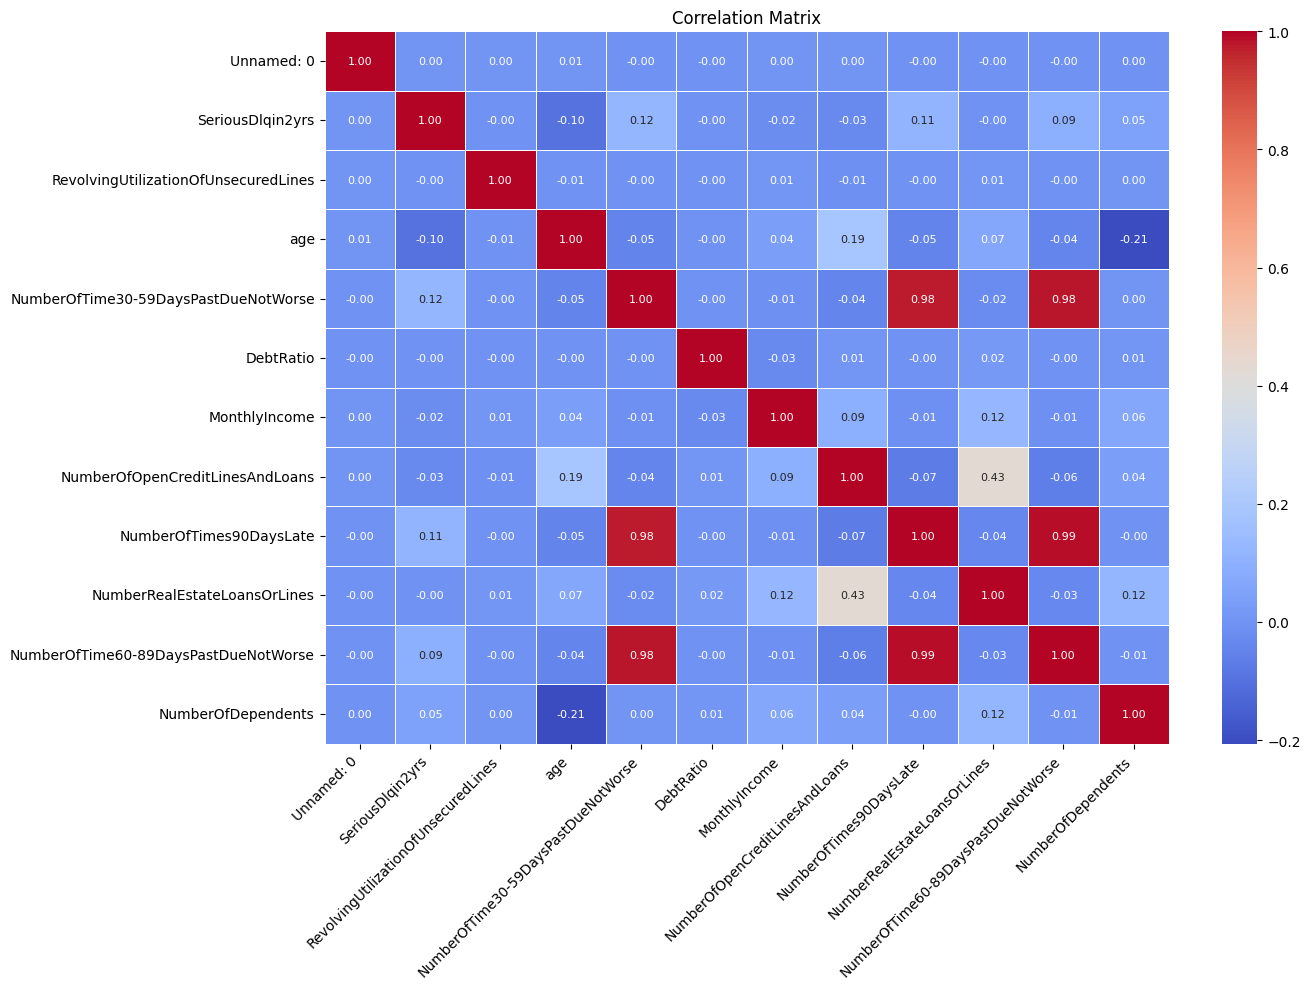

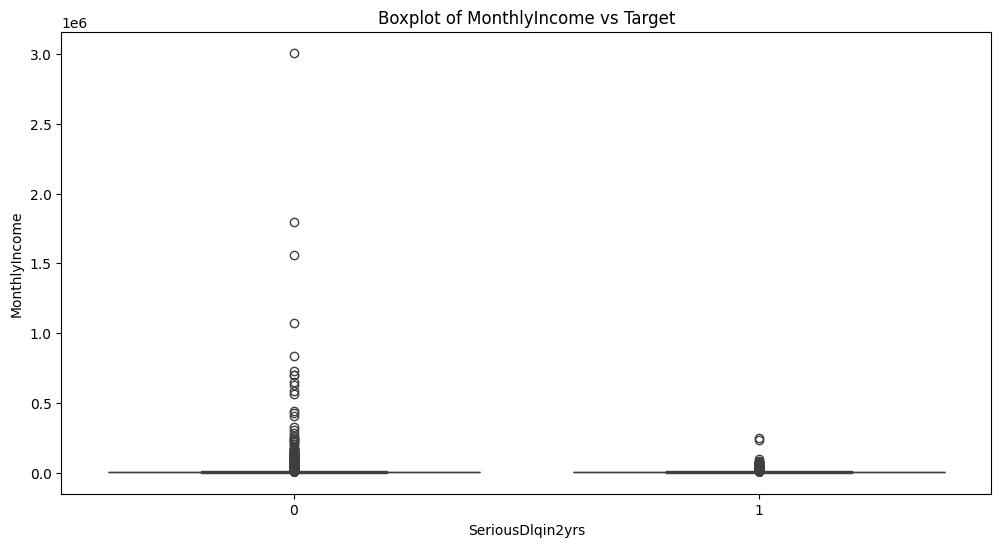

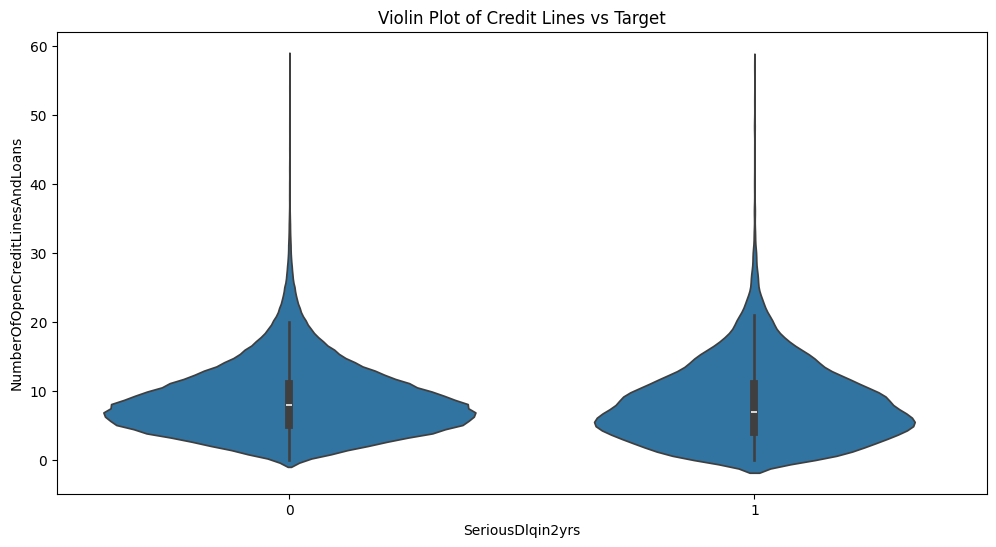

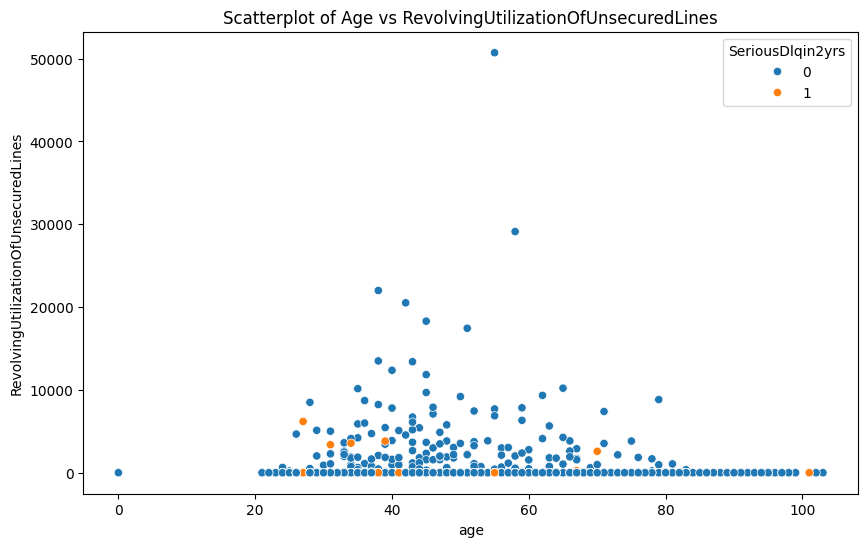

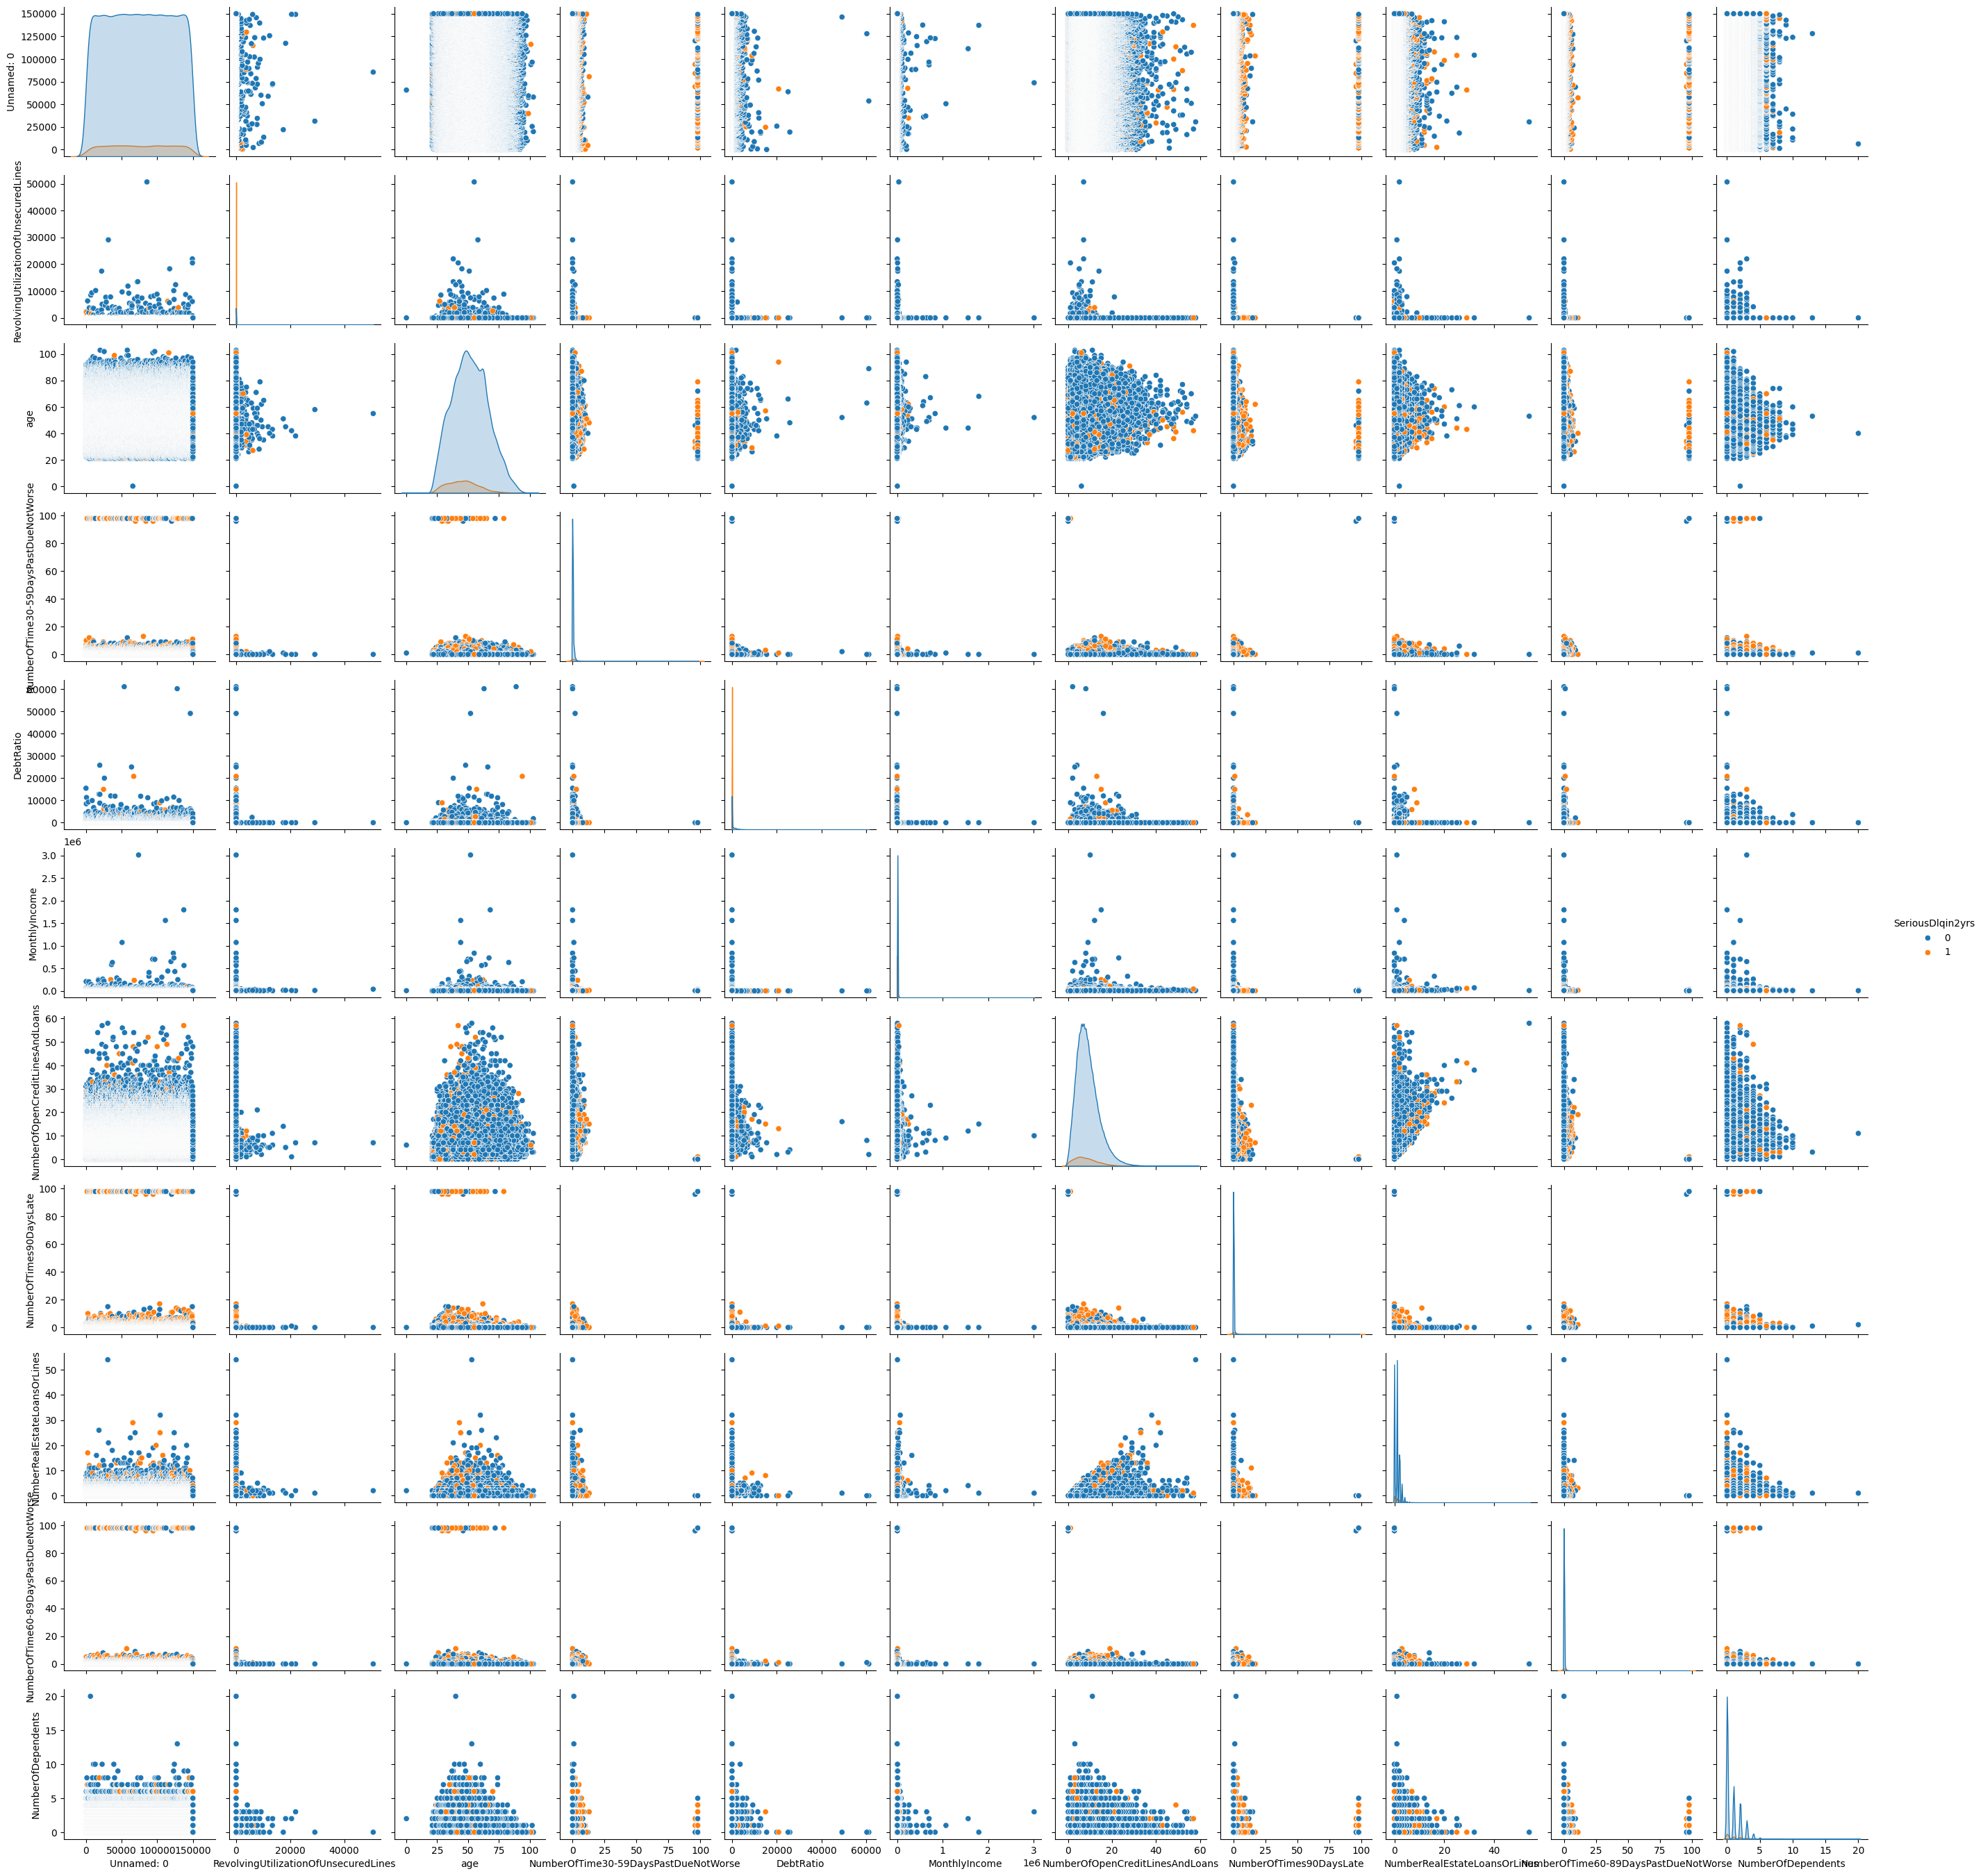

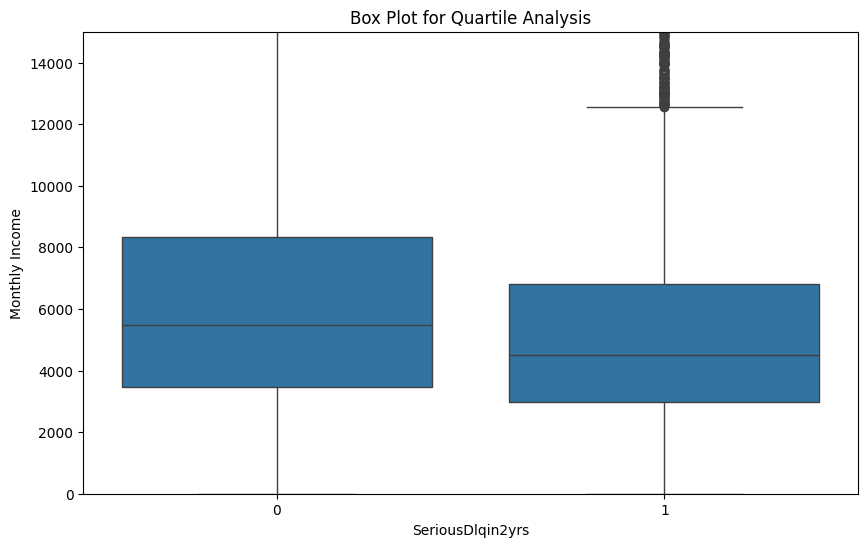

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = 'cs-training.csv'
try:
    credit_cleaned = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset file not found. Ensure the file path is correct.")

# Check and preprocess the data
if 'credit_cleaned' in locals():
    # Replace infinite values with NaN and drop all rows with NaN values
    credit_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
    credit_cleaned.dropna(inplace=True)

    # Descriptive Statistics
    print("Descriptive statistics:")
    print(credit_cleaned.describe())

    # Visualizing the Distributions of Each Feature
    credit_cleaned.hist(bins=20, figsize=(15,10))
    plt.suptitle('Distribution of Features')
    plt.show()

    # Correlation Analysis
    correlation_matrix = credit_cleaned.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Visualizing the relationship between Features and Target
    plt.figure(figsize=(12,6))
    sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=credit_cleaned)
    plt.title('Boxplot of MonthlyIncome vs Target')
    plt.show()

    plt.figure(figsize=(12,6))
    sns.violinplot(x='SeriousDlqin2yrs', y='NumberOfOpenCreditLinesAndLoans', data=credit_cleaned)
    plt.title('Violin Plot of Credit Lines vs Target')
    plt.show()

    # Scatterplot to Analyze Relationships Between Pairs of Variables
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='RevolvingUtilizationOfUnsecuredLines', hue='SeriousDlqin2yrs', data=credit_cleaned)
    plt.title('Scatterplot of Age vs RevolvingUtilizationOfUnsecuredLines')
    plt.show()

    # Corrected: Using 'credit_cleaned' instead of 'credit'
    sns.pairplot(credit_cleaned, hue='SeriousDlqin2yrs', diag_kind='kde')
    plt.show()

    # Box Plot for Quartile Analysis
    plt.figure(figsize=(10,6))
    sns.boxplot(data=credit_cleaned, x='SeriousDlqin2yrs', y='MonthlyIncome')
    plt.title("Box Plot for Quartile Analysis")
    plt.xlabel("SeriousDlqin2yrs")
    plt.ylabel("Monthly Income")
    plt.ylim(0, 15000)
    plt.show()

else:
    print("The script cannot proceed without the dataset.")


Outlier Detection

Dataset loaded successfully.

Descriptive statistics:
          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  120269.000000     120269.000000                         120269.000000   
mean    75026.012514          0.069486                              5.899873   
std     43286.029117          0.254280                            257.040685   
min         1.000000          0.000000                              0.000000   
25%     37678.000000          0.000000                              0.035084   
50%     74969.000000          0.000000                              0.177282   
75%    112494.000000          0.000000                              0.579428   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  120269.000000                         120269.000000  120269.000000   
mean       51.289792                              0.381769      26.5987

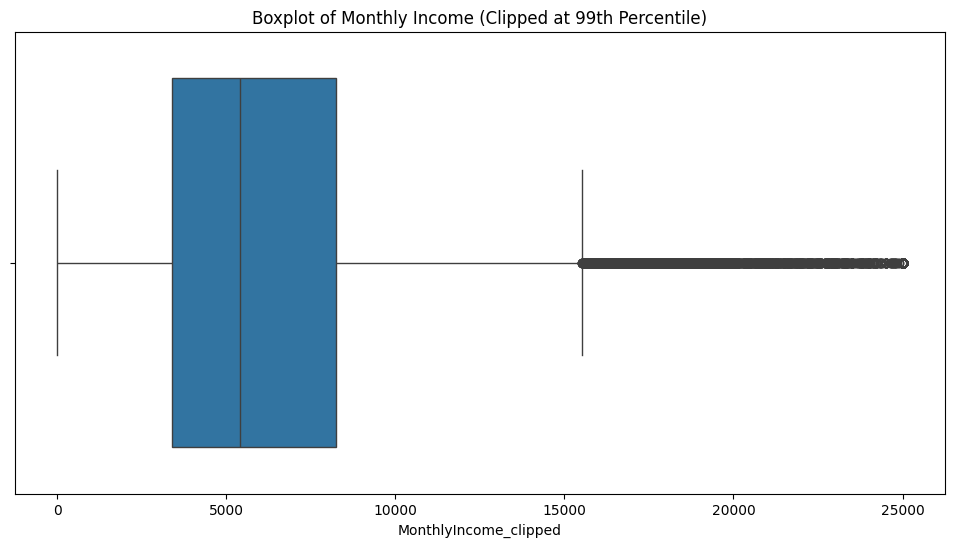

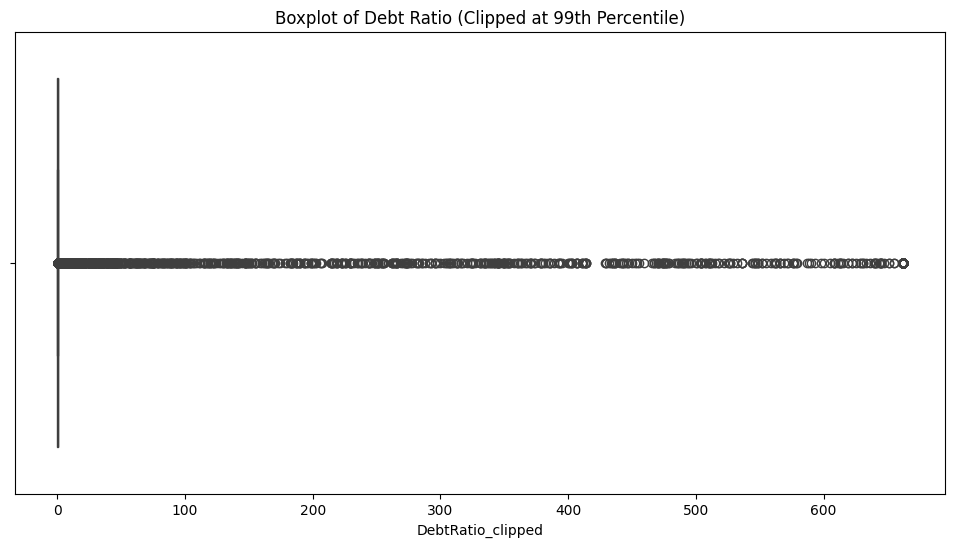

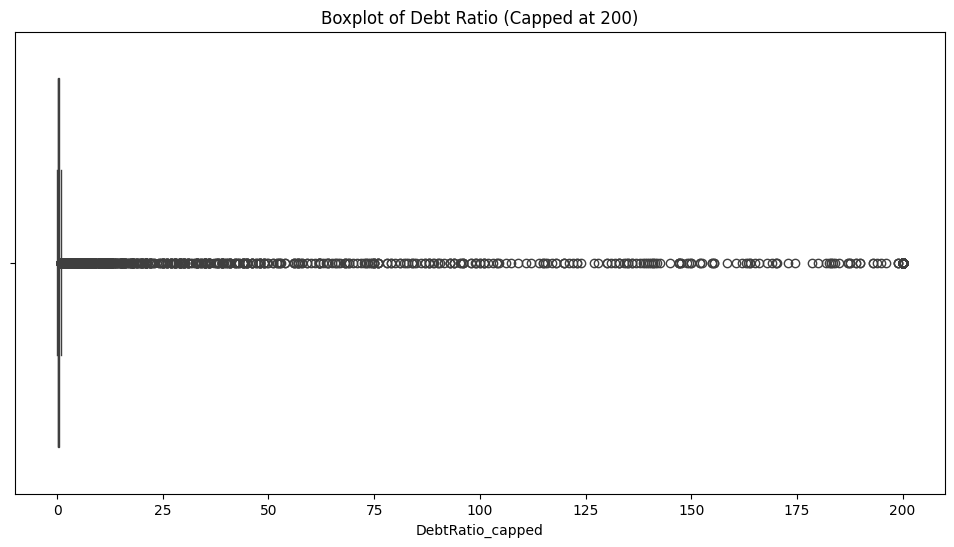

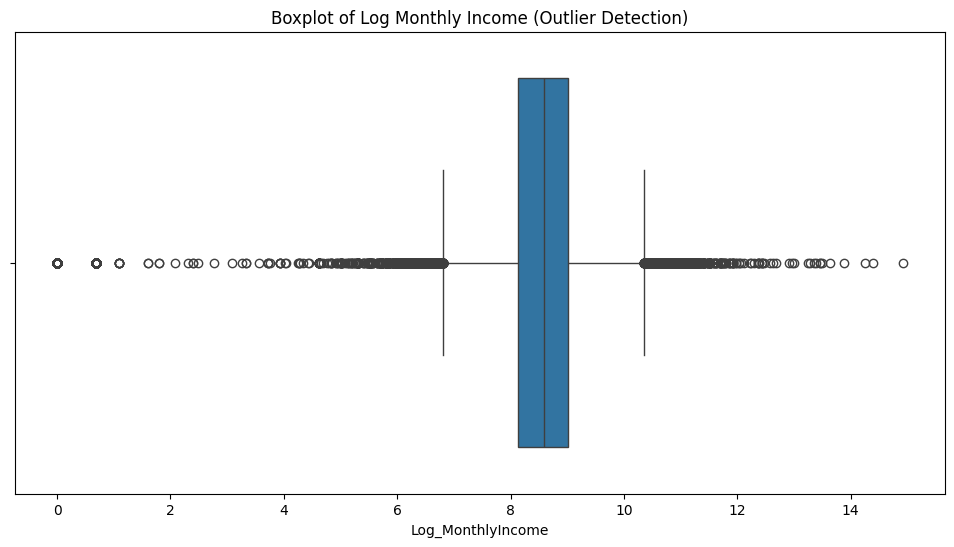

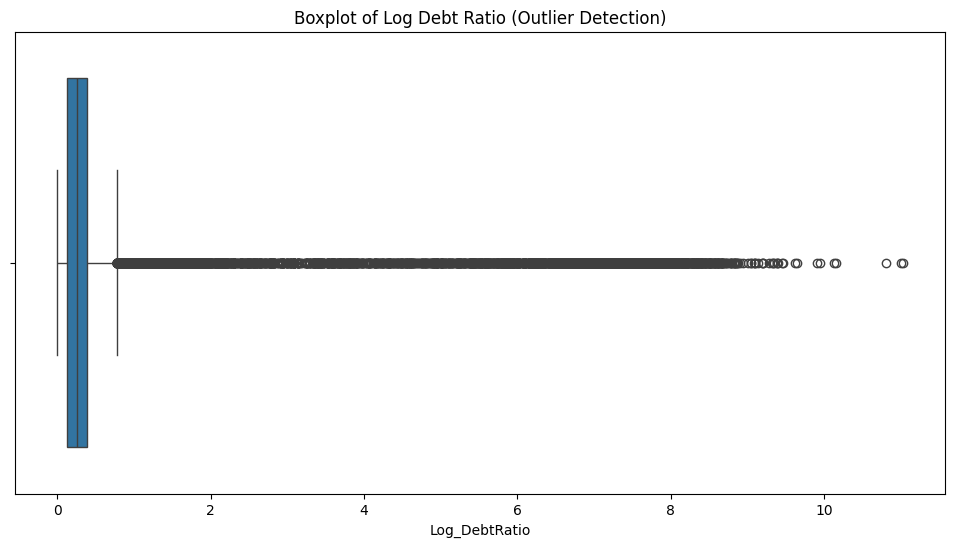


Number of records after removing outliers: 108262


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'cs-training.csv'
try:
    credit_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset file not found. Ensure the file path is correct.")

# Check and preprocess the data
if 'credit_data' in locals():
    # Replace infinite values with NaN and drop all rows with NaN values
    credit_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    credit_data.dropna(inplace=True)

    ### 1. Descriptive Statistics
    print("\nDescriptive statistics:")
    print(credit_data.describe())

    ### 2. Function to detect outliers using the IQR method
    def detect_outliers(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        print(f"\nOutliers detected in '{column}': {len(outliers)}")
        return outliers

    ### 3. Outlier detection for 'MonthlyIncome' and 'DebtRatio'
    monthly_income_outliers = detect_outliers(credit_data, 'MonthlyIncome')
    debt_ratio_outliers = detect_outliers(credit_data, 'DebtRatio')

    ### 4. Clipping extreme outliers for better visualization
    # Clip 'MonthlyIncome' and 'DebtRatio' at the 99th percentile for visualization purposes
    credit_data['MonthlyIncome_clipped'] = credit_data['MonthlyIncome'].clip(upper=credit_data['MonthlyIncome'].quantile(0.99))
    credit_data['DebtRatio_clipped'] = credit_data['DebtRatio'].clip(upper=credit_data['DebtRatio'].quantile(0.99))

    ### 5. Boxplots with further axis limits (focusing on the middle portion of the data)
    # Boxplot for 'MonthlyIncome' with x-axis limit
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=credit_data, x='MonthlyIncome_clipped')
    plt.title('Boxplot of Monthly Income (Clipped at 99th Percentile)')
    plt.show()

    # Boxplot for 'DebtRatio' with x-axis limit
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=credit_data, x='DebtRatio_clipped')
    plt.title('Boxplot of Debt Ratio (Clipped at 99th Percentile)')
    plt.show()

    ### 6. Cap DebtRatio at a reasonable value (e.g., 200)
    # Capping DebtRatio to a maximum value of 200 (based on domain knowledge or analysis)
    credit_data['DebtRatio_capped'] = credit_data['DebtRatio'].clip(upper=200)

    # Boxplot for 'DebtRatio' after capping
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=credit_data, x='DebtRatio_capped')
    plt.title('Boxplot of Debt Ratio (Capped at 200)')
    plt.show()

    ### 7. Log Transformation for better visualization (if needed)
    credit_data['Log_MonthlyIncome'] = np.log1p(credit_data['MonthlyIncome'])
    credit_data['Log_DebtRatio'] = np.log1p(credit_data['DebtRatio'])

    # Boxplot after log transformation for 'MonthlyIncome'
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=credit_data, x='Log_MonthlyIncome')
    plt.title('Boxplot of Log Monthly Income (Outlier Detection)')
    plt.show()

    # Boxplot after log transformation for 'DebtRatio'
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=credit_data, x='Log_DebtRatio')
    plt.title('Boxplot of Log Debt Ratio (Outlier Detection)')
    plt.show()

    ### 8. Optionally, remove outliers from the data (for further analysis)
    def remove_outliers(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only non-outlier rows
        cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        return cleaned_data

    credit_no_outliers = credit_data.copy()
    credit_no_outliers = remove_outliers(credit_no_outliers, 'MonthlyIncome')
    credit_no_outliers = remove_outliers(credit_no_outliers, 'DebtRatio')

    print(f"\nNumber of records after removing outliers: {len(credit_no_outliers)}")

else:
    print("The script cannot proceed without the dataset.")


T-SNE Visualization

Dataset loaded successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


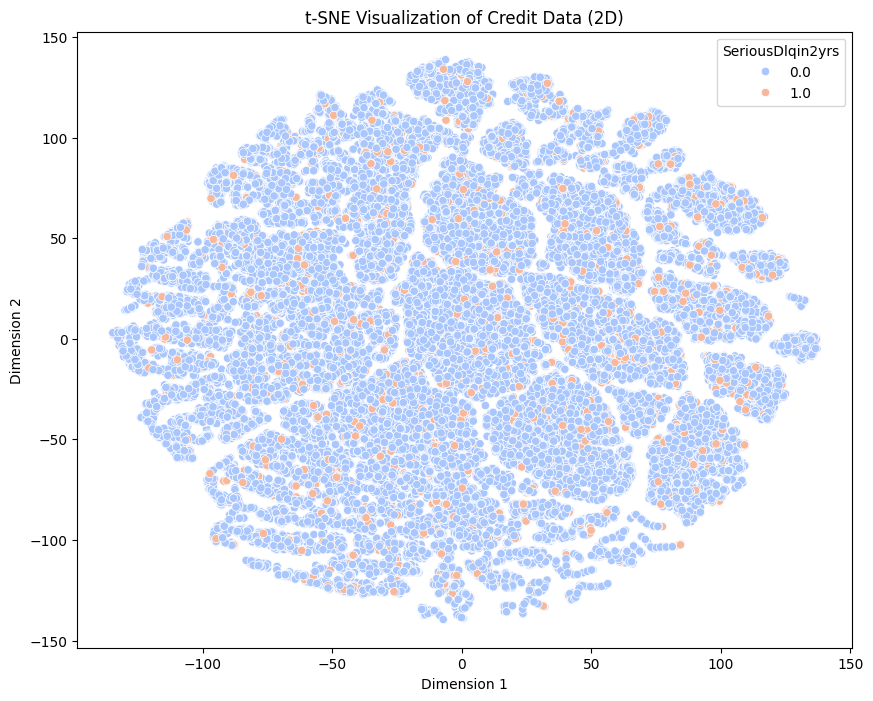

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'cs-training.csv'
try:
    credit_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset file not found. Ensure the file path is correct.")

# Check and preprocess the data
if 'credit_data' in locals():
    # Replace infinite values with NaN and drop rows with NaN values
    credit_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    credit_data.dropna(inplace=True)

    # Select numerical features only for t-SNE (you can add/remove features as needed)
    numerical_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
                          'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
                          'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
                          'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

    # Ensure only numerical features are selected (adjust this based on your dataset)
    credit_numerical = credit_data[numerical_features]

    # Standardize the data to have a mean of 0 and standard deviation of 1
    scaler = StandardScaler()
    credit_scaled = scaler.fit_transform(credit_numerical)

    ### 1. t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # n_components=2 for 2D visualization
    tsne_results = tsne.fit_transform(credit_scaled)

    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dimension 1', 'Dimension 2'])

    # Optionally add the target variable to visualize clusters
    tsne_df['SeriousDlqin2yrs'] = credit_data['SeriousDlqin2yrs']

    ### 2. Visualize the t-SNE results using a scatterplot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='SeriousDlqin2yrs', data=tsne_df, palette='coolwarm', legend='full')
    plt.title('t-SNE Visualization of Credit Data (2D)')
    plt.show()

else:
    print("The script cannot proceed without the dataset.")


Alternative dataset

Dataset loaded successfully.

First 5 rows of the dataset:

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1     

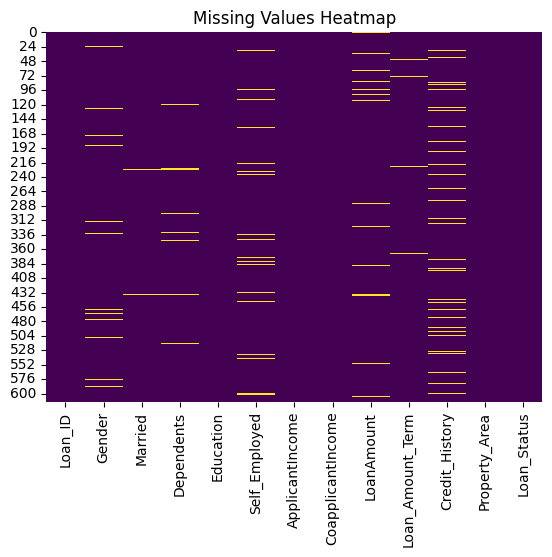

<ipython-input-9-b18af6ecfce8>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[column].fillna(loan_data[column].mode()[0], inplace=True)  # Impute categorical columns
<ipython-input-9-b18af6ecfce8>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin


Missing values after imputation:

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


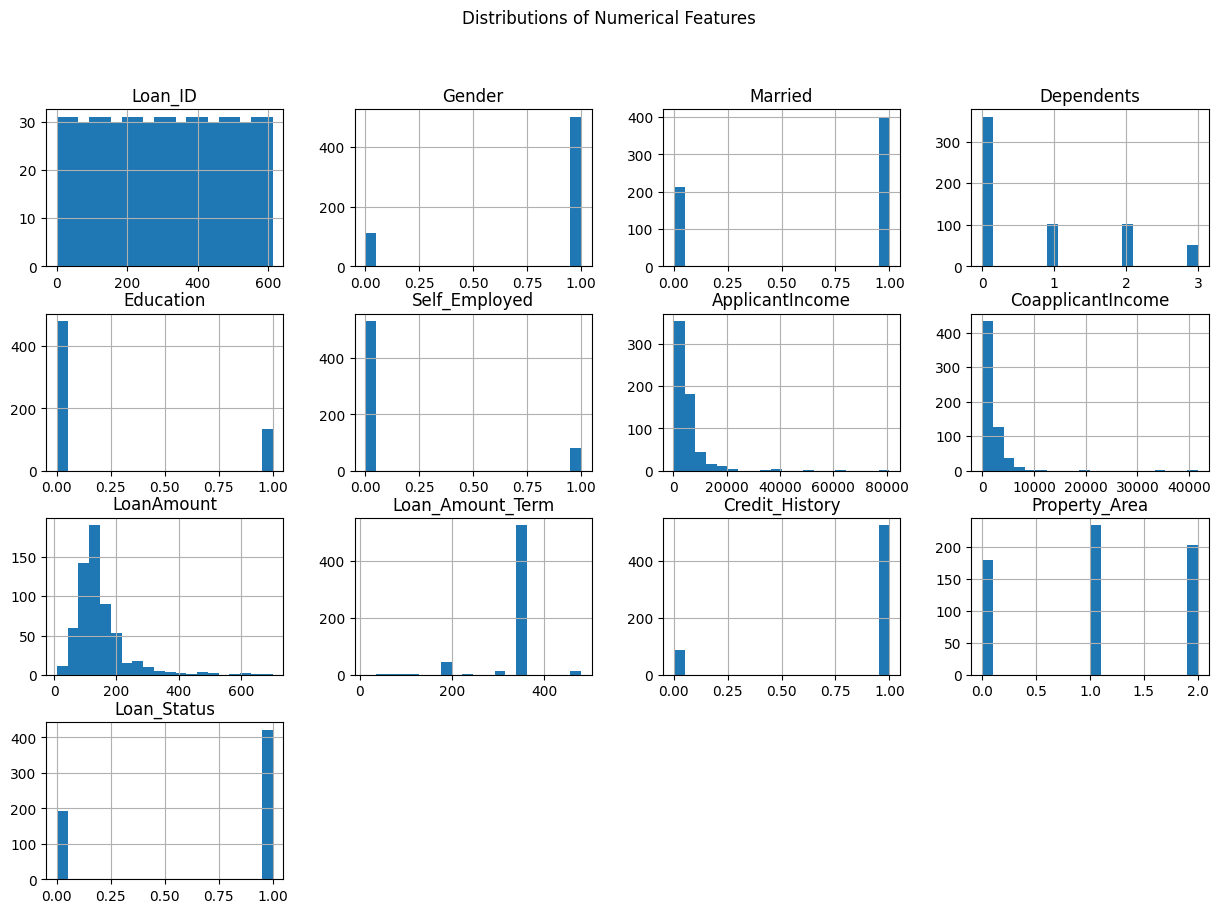

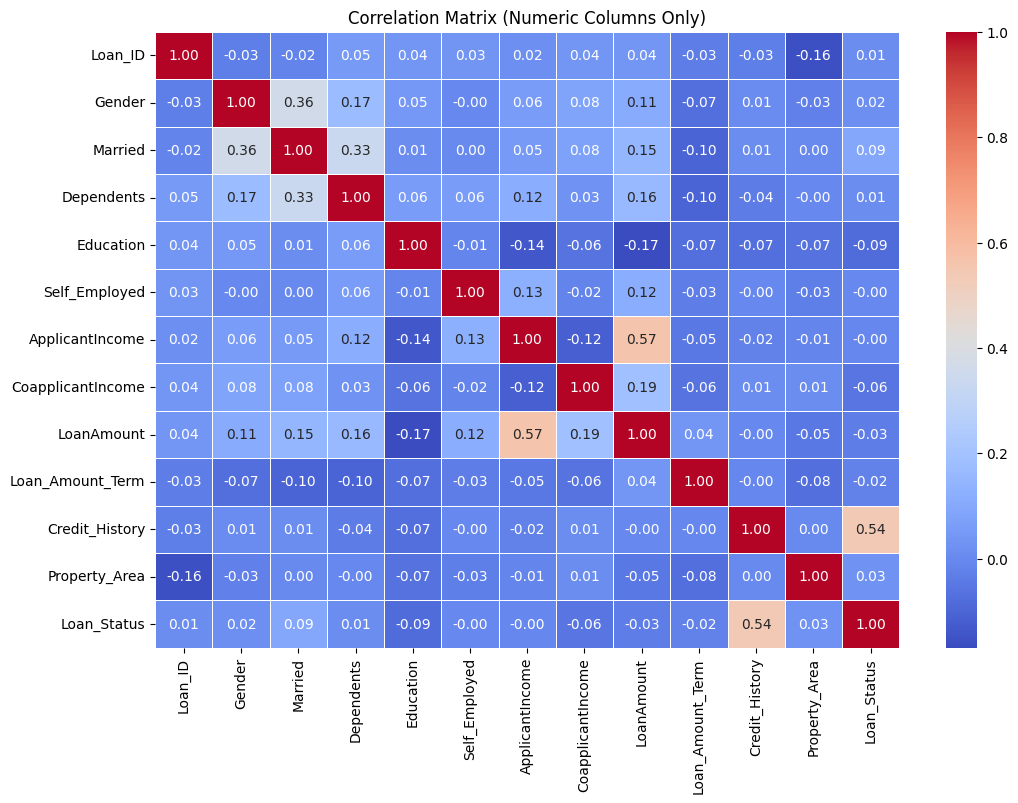

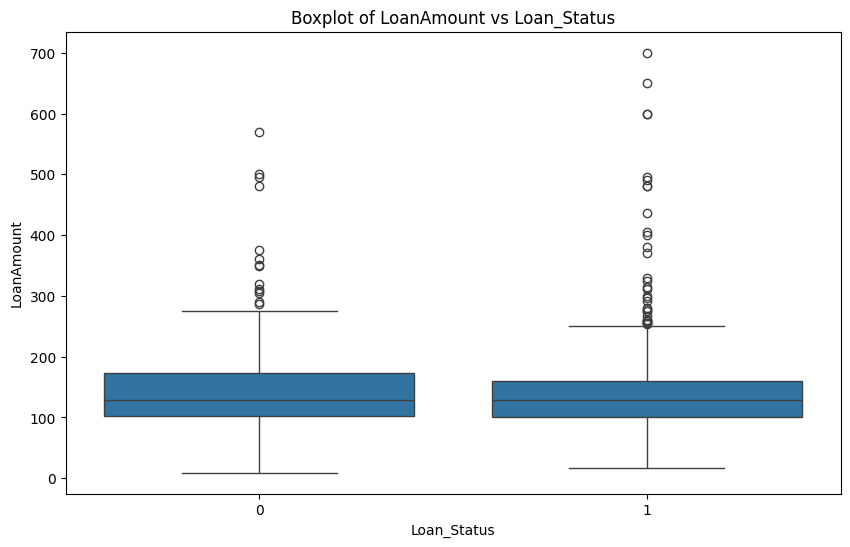


Outliers detected in 'LoanAmount': 41
Number of records after removing outliers: 573


<ipython-input-9-b18af6ecfce8>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cleaned[numerical_cols] = scaler.fit_transform(loan_data_cleaned[numerical_cols])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


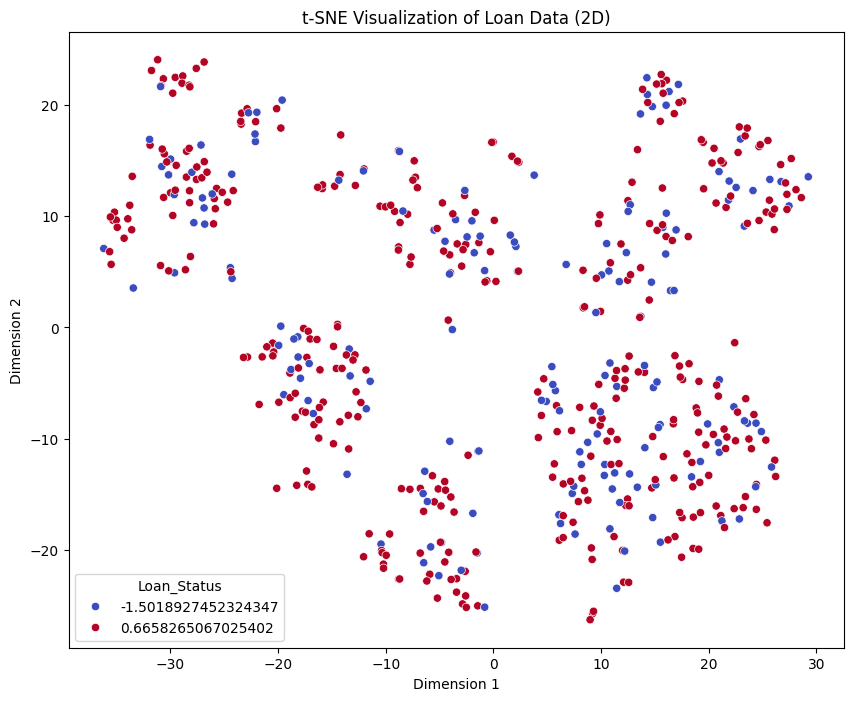

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

# Load dataset
file_path = 'Loan_dataset_train.csv'
try:
    loan_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset file not found. Ensure the file path is correct.")

# Check and preprocess the data
if 'loan_data' in locals():
    ### 1. Data Exploration (EDA) ###
    # Head and Info
    print("\nFirst 5 rows of the dataset:\n")
    print(loan_data.head())  # Display the first few rows

    print("\nBasic Info about the dataset:\n")
    print(loan_data.info())  # Checking data types and missing values

    print("\nDescriptive statistics:\n")
    print(loan_data.describe())  # Summary statistics for numerical features

    # Visualizing missing values
    sns.heatmap(loan_data.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()

    ### 2. Data Cleaning ###
    # Handle missing values by imputing with median for numerical and mode for categorical variables
    for column in loan_data.columns:
        if loan_data[column].dtype == 'object':
            loan_data[column].fillna(loan_data[column].mode()[0], inplace=True)  # Impute categorical columns
        else:
            loan_data[column].fillna(loan_data[column].median(), inplace=True)   # Impute numerical columns

    # Check again after filling missing values
    print("\nMissing values after imputation:\n")
    print(loan_data.isnull().sum())

    ### 3. Encoding Categorical Variables ###
    # Label Encoding for categorical variables
    categorical_cols = loan_data.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        loan_data[col] = le.fit_transform(loan_data[col])
        label_encoders[col] = le

    ### 4. Data Visualization (EDA) ###
    # Visualize distributions for numerical features
    loan_data.hist(bins=20, figsize=(15, 10))
    plt.suptitle('Distributions of Numerical Features')
    plt.show()

    # Correlation Matrix and Heatmap (Exclude non-numeric columns)
    numerical_cols = loan_data.select_dtypes(include=[np.number])  # Select only numeric columns
    plt.figure(figsize=(12, 8))
    correlation_matrix = numerical_cols.corr()  # Correlation only on numeric columns
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix (Numeric Columns Only)')
    plt.show()

    # Boxplot to analyze target variable's relationship with 'LoanAmount'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_data)
    plt.title('Boxplot of LoanAmount vs Loan_Status')
    plt.show()

    ### 5. Outlier Detection and Removal ###
    def detect_outliers(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        return lower_bound, upper_bound, outliers

    # Detect outliers in 'LoanAmount'
    loan_lower, loan_upper, loan_outliers = detect_outliers(loan_data, 'LoanAmount')
    print(f"\nOutliers detected in 'LoanAmount': {len(loan_outliers)}")

    # Remove outliers from LoanAmount
    loan_data_cleaned = loan_data[(loan_data['LoanAmount'] >= loan_lower) & (loan_data['LoanAmount'] <= loan_upper)]
    print(f"Number of records after removing outliers: {len(loan_data_cleaned)}")

    ### 6. Feature Scaling ###
    # Scale numerical features using StandardScaler
    scaler = StandardScaler()
    numerical_cols = loan_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
    loan_data_cleaned[numerical_cols] = scaler.fit_transform(loan_data_cleaned[numerical_cols])

    ### 7. t-SNE Visualization (for Dimensionality Reduction) ###
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(loan_data_cleaned.drop(columns='Loan_Status'))

    # Creating a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['Dimension 1', 'Dimension 2'])
    tsne_df['Loan_Status'] = loan_data_cleaned['Loan_Status']

    # Visualizing t-SNE results
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Loan_Status', data=tsne_df, palette='coolwarm', legend='full')
    plt.title('t-SNE Visualization of Loan Data (2D)')
    plt.show()

else:
    print("The script cannot proceed without the dataset.")


R3 Clustering.

Clustering in Tabular dataset.

Finding an optimal clusters

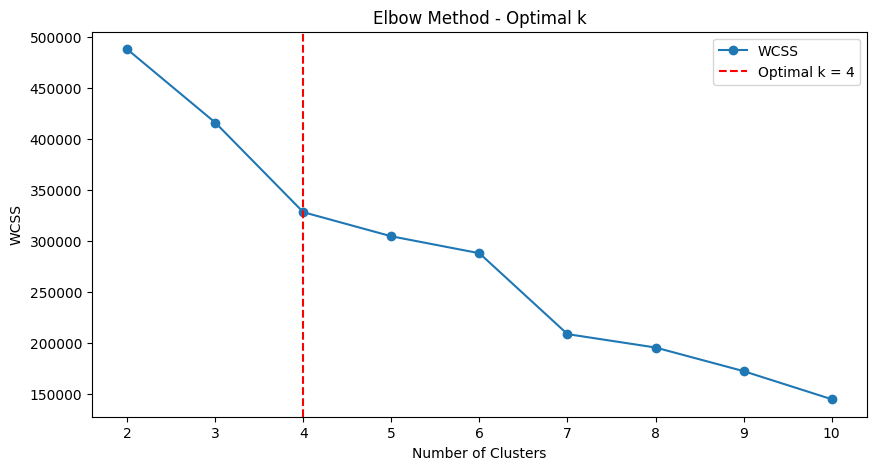

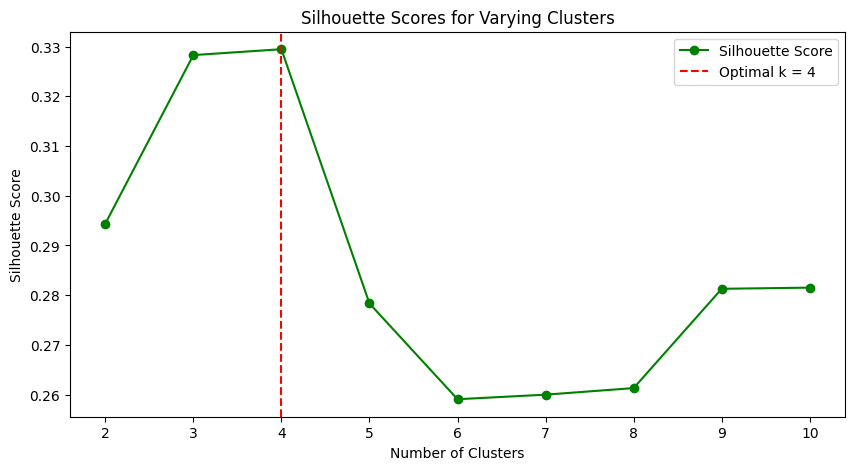

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load cs dataset
file_path = 'cs-training.csv'
cs_data = pd.read_csv(file_path)

# Preprocessing: Select relevant features and scale data
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']  # Adjust features based on dataset
X = cs_data[features].fillna(0)  # Handling missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method and Silhouette Score for optimal number of clusters
def evaluate_kmeans(X, max_clusters=10, elbow_point=4):
    wcss = []
    silhouette_scores = []

    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)  # WCSS (Within-Cluster Sum of Squares)

        # Silhouette Score
        cluster_labels = kmeans.predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot WCSS (Elbow Method)
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), wcss, marker='o', label="WCSS")
    plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Optimal k = {elbow_point}')
    plt.title('Elbow Method - Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.legend()
    plt.show()

    # Plot Silhouette Score
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', label="Silhouette Score", color='green')
    plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Optimal k = {elbow_point}')
    plt.title('Silhouette Scores for Varying Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

# Run the K-means evaluation for Elbow and Silhouette scores
evaluate_kmeans(X_scaled, max_clusters=10, elbow_point=4)


K means cluster using PCA. Optimal K is 4

K-Means Silhouette Score: 0.3176


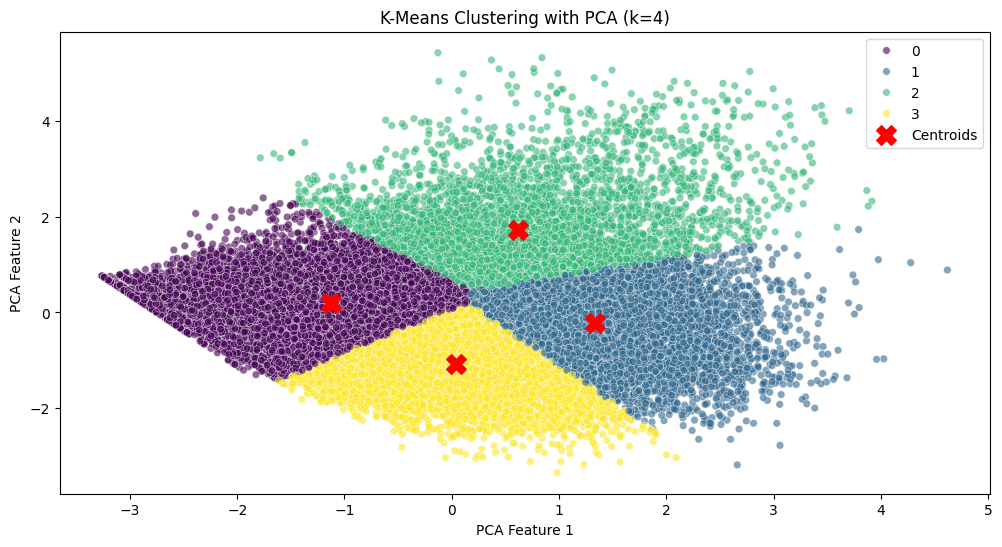

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset (replace with actual dataset path)
file_path = 'cs-training.csv'
data = pd.read_csv(file_path)

# Select features to use for clustering
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']
data = data[features].fillna(0)  # Handle missing values

# Step 1: Remove outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Use a smaller sample for quicker visualization (you can remove this for full data)
data_sampled = data.sample(frac=0.3, random_state=42)  # Take 30% of the data for quicker results

# Step 2: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

# Step 3: Perform PCA (faster solver and minimal components)
pca = PCA(n_components=2, svd_solver='randomized')  # Use randomized solver for faster execution
data_pca = pca.fit_transform(data_scaled)

# Step 4: Apply MiniBatch K-Means clustering for faster execution
n_clusters = 4  # Change based on previous analysis
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=500, n_init=1)
kmeans_labels = kmeans.fit_predict(data_pca)

# Step 5: Compute Silhouette Score
silhouette_avg = silhouette_score(data_pca, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_avg:.4f}")

# Step 6: Visualize the clustered data with centroids (use faster plotting libraries)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.6, s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with PCA (k={n_clusters})')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


Accuracy of K means clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy import stats

# Load dataset (replace with your file path)
file_path = 'cs-training.csv'
data = pd.read_csv(file_path)

# Select features to use for clustering
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']
data = data[features].fillna(0)  # Handle missing values

# Step 1: Remove outliers using Z-Score
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Z-score method to remove more aggressive outliers
z_scores = np.abs(stats.zscore(data_scaled))
data_no_outliers = data_scaled[(z_scores < 3).all(axis=1)]

# Step 2: Perform K-Means Clustering with the optimal number of clusters (k=5 based on your analysis)
n_clusters = 4  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(data_no_outliers)

# Step 3: Evaluate clustering performance using the desired metrics
silhouette_avg = silhouette_score(data_no_outliers, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(data_no_outliers, kmeans_labels)
davies_bouldin = davies_bouldin_score(data_no_outliers, kmeans_labels)

# Print clustering scores
print(f"K-Means Silhouette Score: {silhouette_avg:.4f}")
print(f"K-Means Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"K-Means Davies-Bouldin Score: {davies_bouldin:.4f}")


K-Means Silhouette Score: 0.3583
K-Means Calinski-Harabasz Score: 131706.1919
K-Means Davies-Bouldin Score: 0.8510


Analysis of different clusters and silhouette scores

Explained variance by each component: [0.70957927 0.288253  ]
For n_clusters = 2, the average silhouette_score is: 0.4162


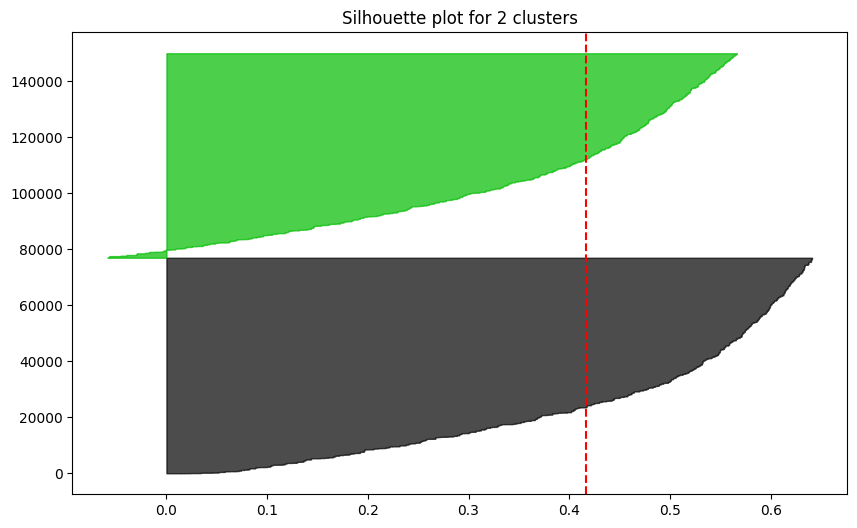

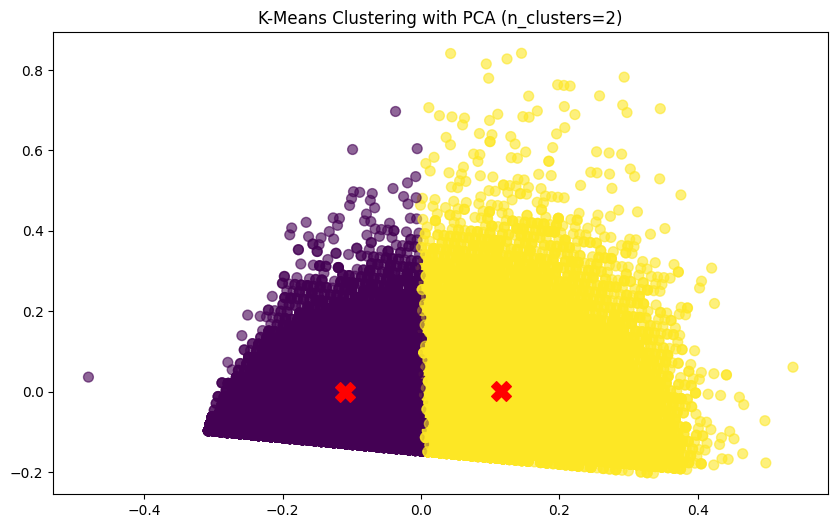

For n_clusters = 3, the average silhouette_score is: 0.3859


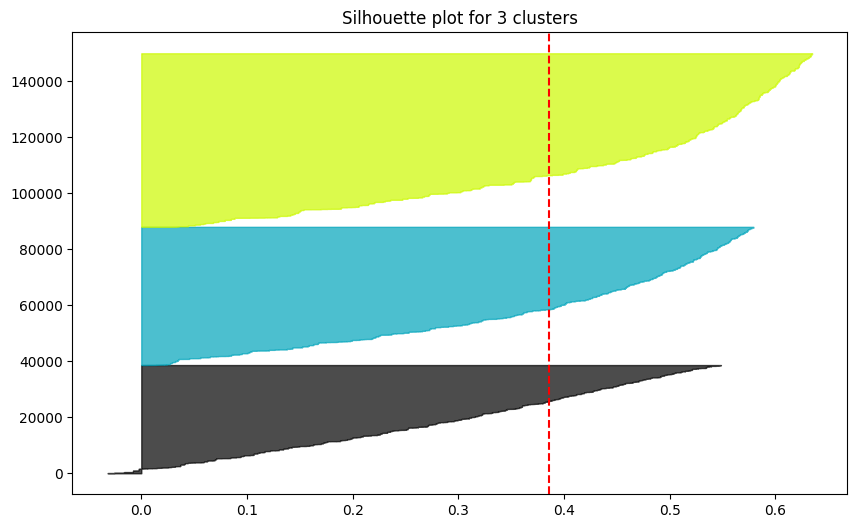

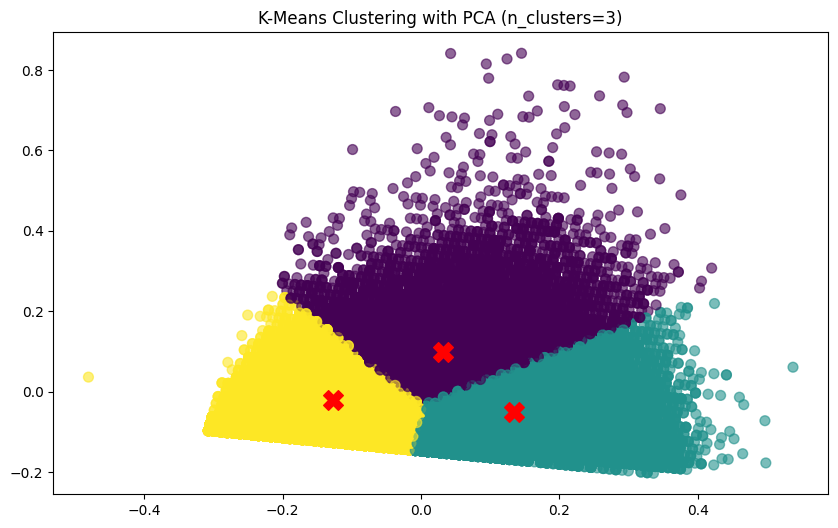

For n_clusters = 4, the average silhouette_score is: 0.3622


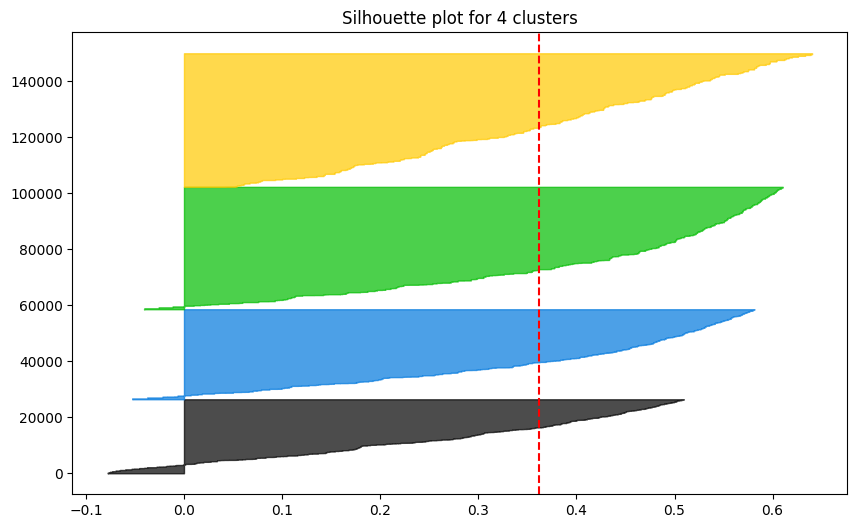

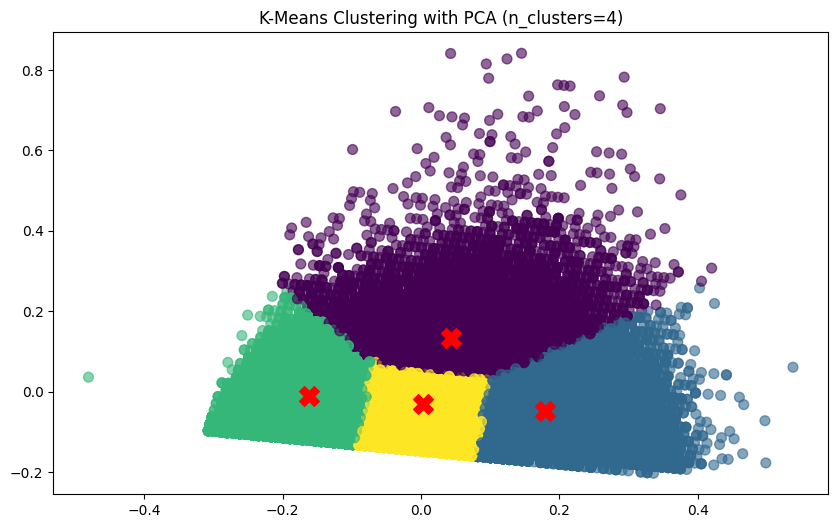

For n_clusters = 5, the average silhouette_score is: 0.3532


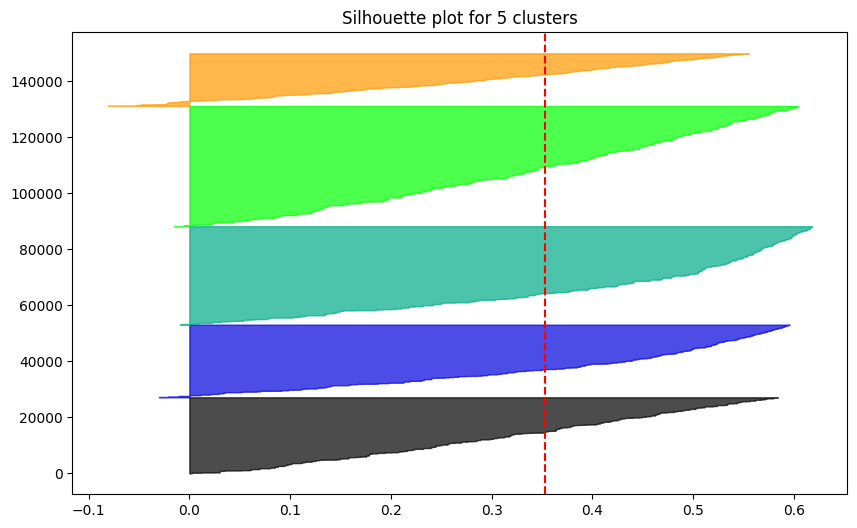

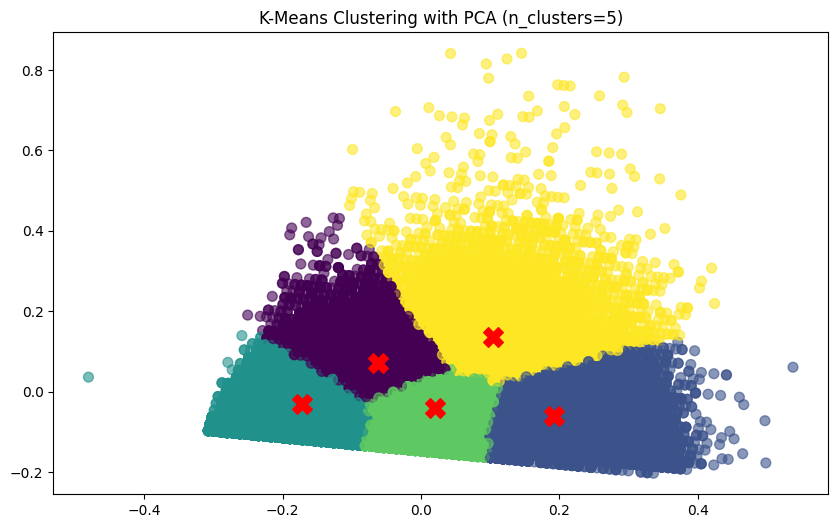

For n_clusters = 6, the average silhouette_score is: 0.3454


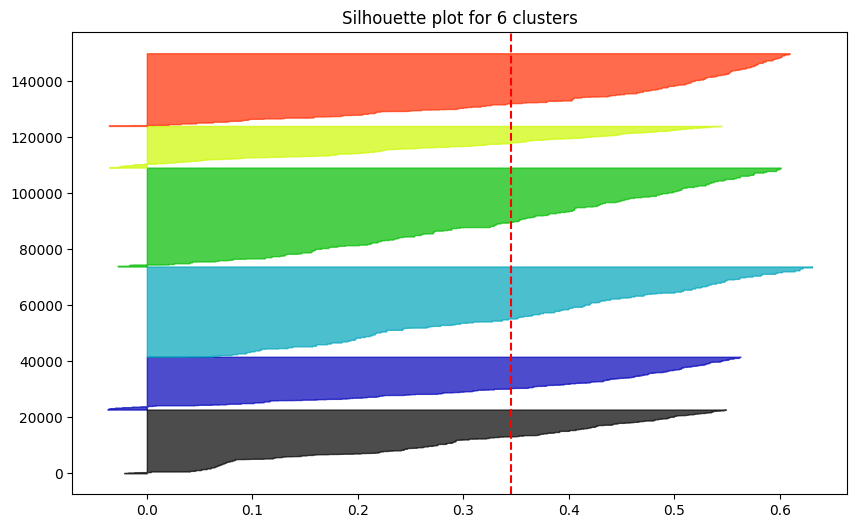

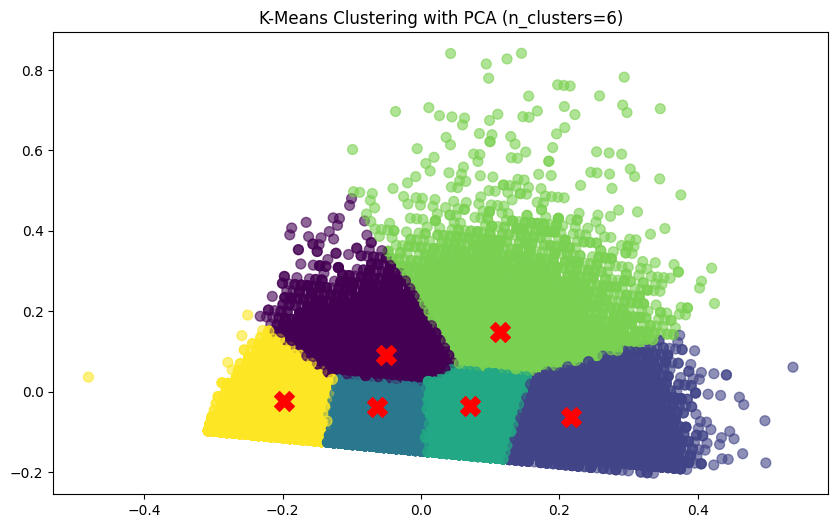

For n_clusters = 7, the average silhouette_score is: 0.3351


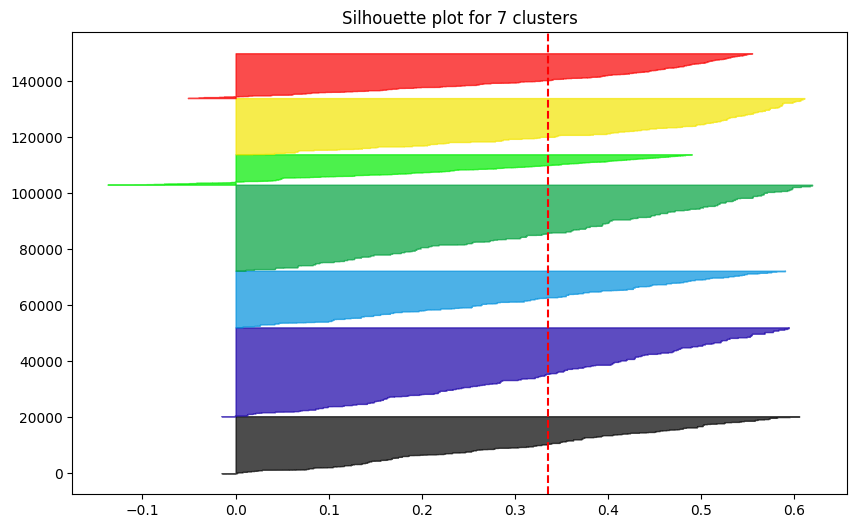

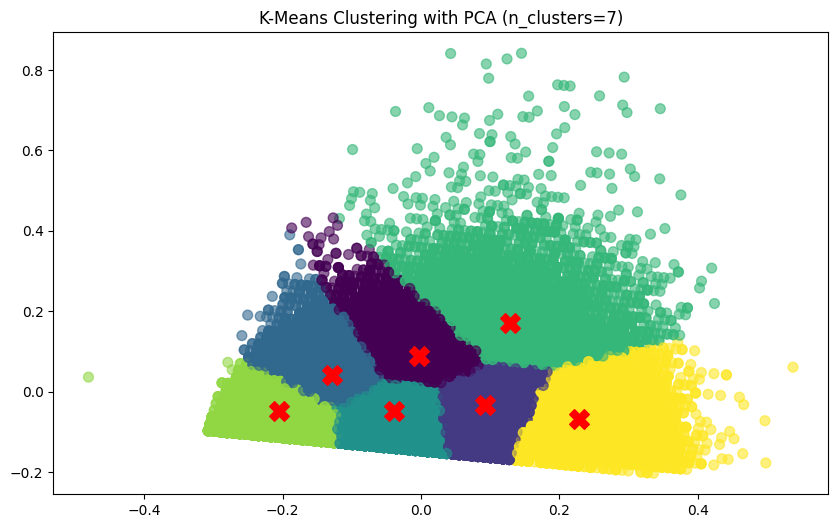

For n_clusters = 8, the average silhouette_score is: 0.3499


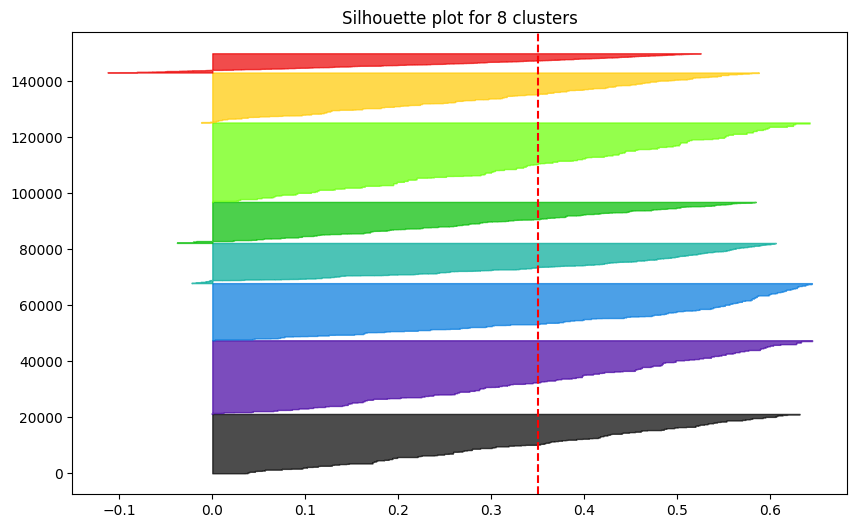

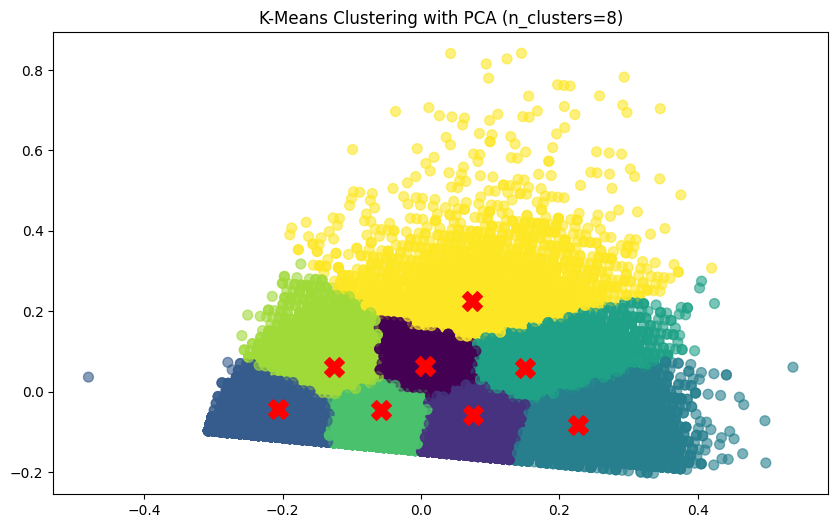

For n_clusters = 9, the average silhouette_score is: 0.3305


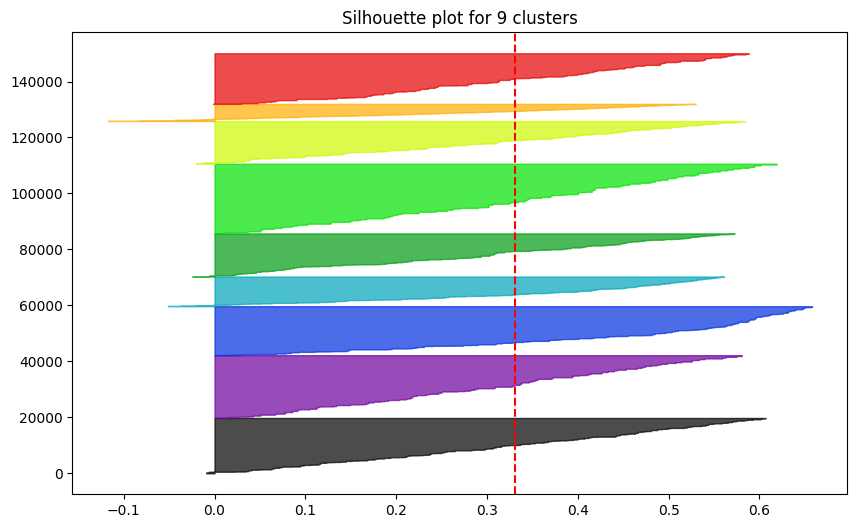

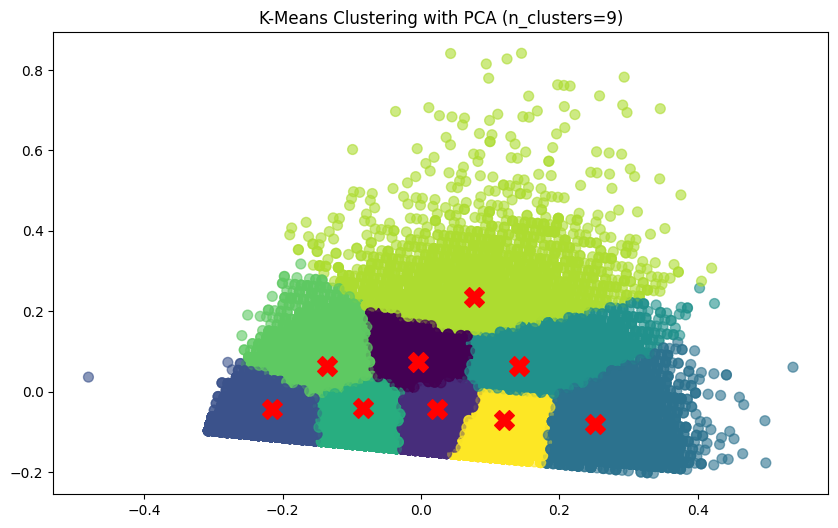

For n_clusters = 10, the average silhouette_score is: 0.3344


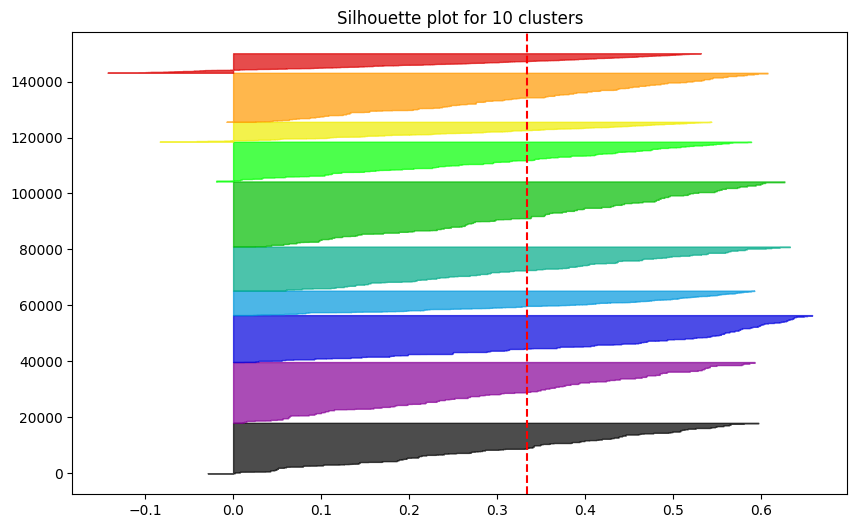

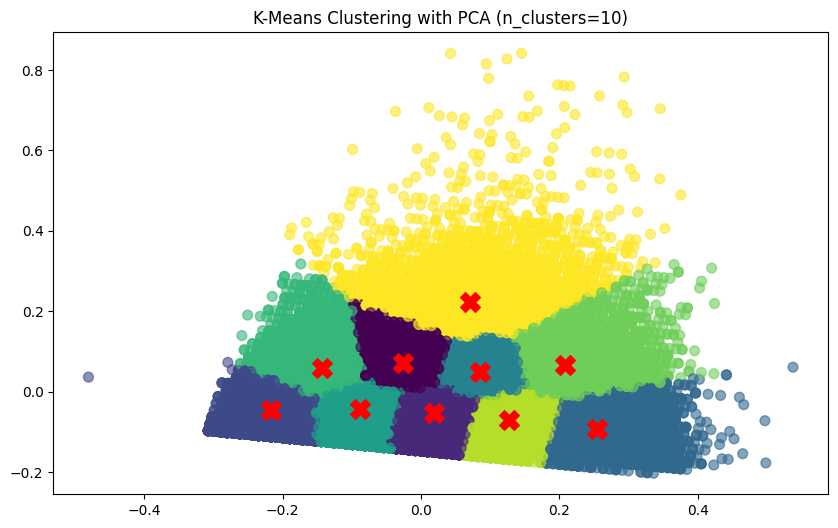

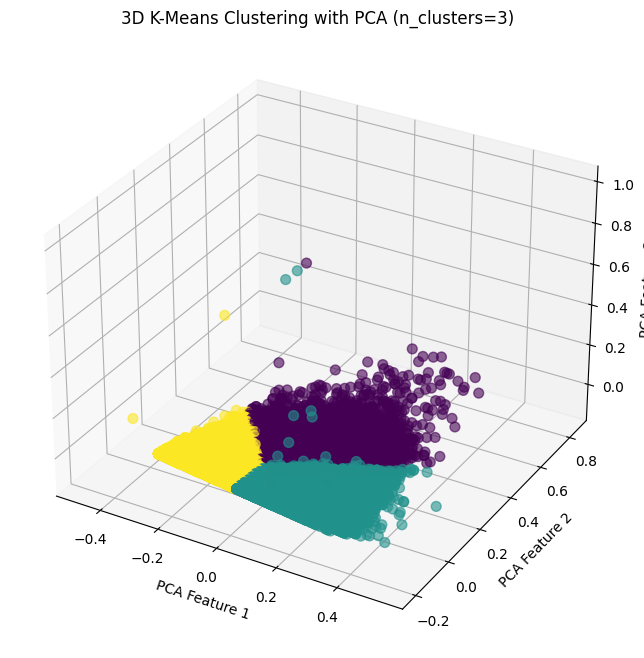

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the cs dataset (replace with your file path)
file_path = 'cs-training.csv'
cs_data = pd.read_csv(file_path)

# Preprocessing: Select relevant features and handle missing values
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']
data = cs_data[features].fillna(0)  # Handle missing values by replacing with 0

# Use MinMaxScaler for compact visualization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 1: Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

# Step 2: Find optimal number of clusters with Silhouette Score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=500)
    cluster_labels = clusterer.fit_predict(data_2D)

    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(data_2D, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.4f}")

    # Silhouette analysis and plotting
    sample_silhouette_values = silhouette_samples(data_2D, cluster_labels)
    y_lower = 10
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette plot for {n_clusters} clusters")
    plt.show()

    # Visualization of clusters with PCA
    plt.figure(figsize=(10, 6))
    plt.scatter(data_2D[:, 0], data_2D[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    centers = clusterer.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f"K-Means Clustering with PCA (n_clusters={n_clusters})")
    plt.show()

# Step 3: 3D PCA visualization
pca_3d = PCA(n_components=3)
data_3D = pca_3d.fit_transform(data_scaled)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
clusterer_3d = KMeans(n_clusters=3, random_state=10, max_iter=500)
cluster_labels_3d = clusterer_3d.fit_predict(data_3D)
ax.scatter(data_3D[:, 0], data_3D[:, 1], data_3D[:, 2], c=cluster_labels_3d, cmap='viridis', s=50, alpha=0.6)
ax.set_title(f'3D K-Means Clustering with PCA (n_clusters=3)')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


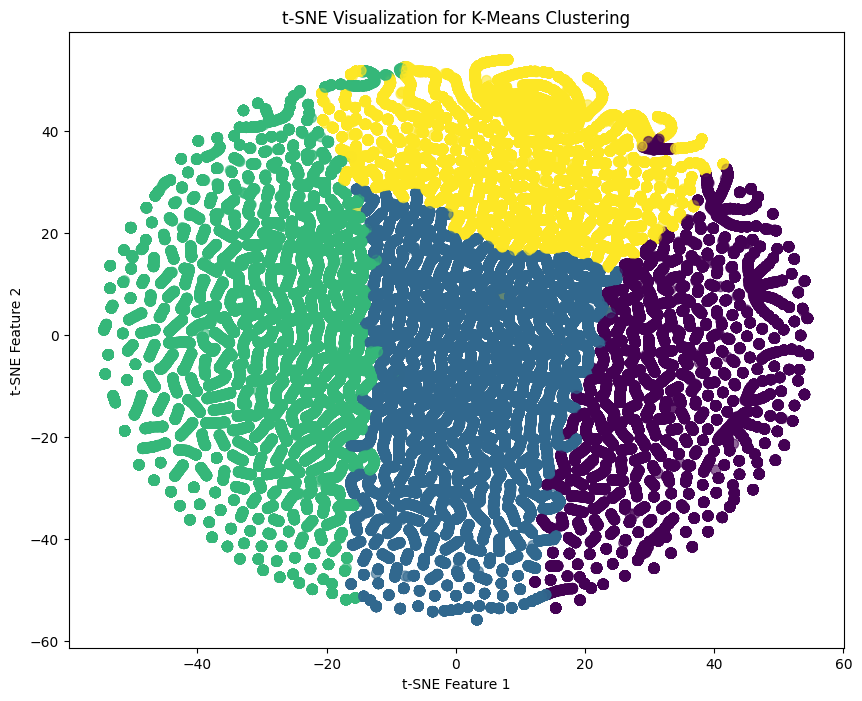

Silhouette Score: 0.3632
Calinski-Harabasz Score: 127270.4230
Davies-Bouldin Score: 0.8853


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
file_path = 'cs-training.csv'
cs_data = pd.read_csv(file_path)

# Preprocessing: Select relevant features and handle missing values
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']
data = cs_data[features].fillna(0)  # Handle missing values by replacing with 0

# Use MinMaxScaler for compact visualization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Perform KMeans clustering with a predefined number of clusters (example: 4)
clusterer = KMeans(n_clusters=4, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(data_scaled)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, n_iter=1000, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Visualize t-SNE output
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('t-SNE Visualization for K-Means Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

# Step 1: Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

# Step 2: Calculate Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled, cluster_labels)

# Step 3: Calculate Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)

# Print the evaluation scores
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")


DBSCAN Clustering

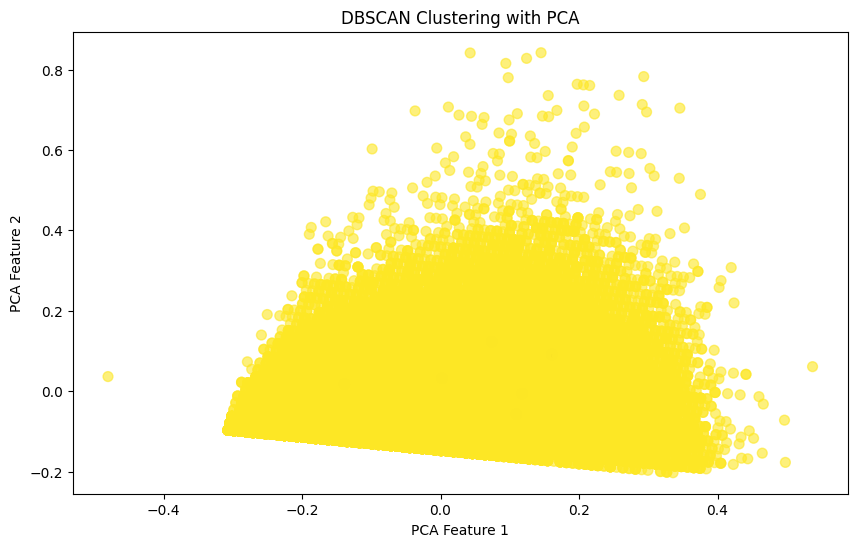

DBSCAN Silhouette Score: 0.7759594835260469


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'cs-training.csv'
cs_data = pd.read_csv(file_path)

# Preprocessing: Select relevant features and handle missing values
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']
data = cs_data[features].fillna(0)  # Handle missing values by replacing with 0

# Use MinMaxScaler for compact visualization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualize DBSCAN clustering with PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.6)
plt.title(f"DBSCAN Clustering with PCA")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

# Calculate the Silhouette Score for DBSCAN
if len(set(dbscan_labels)) > 1:
    silhouette_score_dbscan = silhouette_score(data_scaled, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {silhouette_score_dbscan}')
else:
    print("DBSCAN did not form enough clusters.")


GMM clustering and Hierarchical Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Load the cs-training dataset
data = pd.read_csv('cs-training.csv')

# Select relevant features (excluding the target column if it's present)
features = ['MonthlyIncome', 'DebtRatio', 'age', 'NumberOfOpenCreditLinesAndLoans']
data = data[features].fillna(0)  # Handle missing values by filling with 0

# Step 1: Remove outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Number of clusters
n_clusters = 4  # Change this based on your analysis (e.g., elbow method)

# Step 2: Hierarchical Clustering (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_cluster.fit_predict(data_scaled)

# Evaluate Agglomerative Clustering
agg_silhouette = silhouette_score(data_scaled, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(data_scaled, agg_labels)
agg_davies_bouldin = davies_bouldin_score(data_scaled, agg_labels)

# Step 3: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm_labels = gmm.fit(data_scaled).predict(data_scaled)

# Evaluate GMM Clustering
gmm_silhouette = silhouette_score(data_scaled, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(data_scaled, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(data_scaled, gmm_labels)

# Step 4: Visualization of Clustering

# PCA for visualization
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data_scaled)

# Visualize Agglomerative Clustering
plt.figure(figsize=(10, 8))
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering (Agglomerative)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Visualize GMM Clustering
plt.figure(figsize=(10, 8))
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Step 5: Print Evaluation Results
print("Hierarchical Clustering Silhouette Score:", agg_silhouette)
print("Hierarchical Clustering Calinski-Harabasz Score:", agg_calinski_harabasz)
print("Hierarchical Clustering Davies-Bouldin Score:", agg_davies_bouldin)

print("GMM Silhouette Score:", gmm_silhouette)
print("GMM Calinski-Harabasz Score:", gmm_calinski_harabasz)
print("GMM Davies-Bouldin Score:", gmm_davies_bouldin)


Image clustering using another dataset using Sign train dataset.




R4 Decision Tree
